# Downloading and installing the libraries  | Drive access

In [ ]:
!pip install "netCDF4<1.6.0"
!pip install git+https://github.com/Projeto-Jupiter/RocketPy.git@v0.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.7 MB/s eta 0:00:00
  Cloning https://github.com/Projeto-Jupiter/RocketPy.git (to revision v0.11.0) to /tmp/pip-req-build-m_lxq5az
  Running command git clone --filter=blob:none --quiet https://github.com/Projeto-Jupiter/RocketPy.git /tmp/pip-req-build-m_lxq5az
  Running command git checkout -q e00368f3238f6d6384b802aa88312b7c8cac6e91
  Resolved https://github.com/Projeto-Jupiter/RocketPy.git to commit e00368f3238f6d6384b802aa88312b7c8cac6e91
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 37.3 MB/s eta 0:00:00
  Created wheel for rocketpy: filename=rocketpy-0.11.0-py3-none-any.whl size=110763 sha256=118cee

In [ ]:
import netCDF4
from rocketpy import *

In [ ]:
# !sed -i -e 's/enforce_single_parent:true/enforce_single_parent:true,metadata_cache_reset_counter:4/' /usr/local/lib/python3.6/dist-packages/google/colab/drive.py
from google.colab import drive
import importlib
_ = importlib.reload(drive)

from google.colab import drive
drive.mount('/gdrive')

# Escolhemos a pasta onde pegaremos alguns arquivos
import os
#os.chdir("/gdrive/MyDrive/USP/0 - Jupiter/Truncated Airfoil research/Simulations/RocketPy/Data/")  # Calebe
os.chdir("/gdrive/MyDrive/Truncated Airfoil research/Simulations/RocketPy/Data/")  # Sofia


Mounted at /gdrive


In [ ]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = [8, 5]
mpl.rcParams['figure.dpi'] = 120
mpl.rcParams['font.size'] = 10
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'

# Environment, Motor, P x Alt, Thomas algorithm and event detection


/usr/local/lib/python3.10/dist-packages/rocketpy/Environment.py:1825: UserWarning: Exact chosen launch time is not available in the provided file, using 2024-12-15 12:00:00 UTC instead.
  warnings.warn(


Gravity Details

Acceleration of Gravity: 9.8 m/s²


Launch Site Details

Launch Rail Length: 6  m
Launch Date: 2024-12-15 11:00:00 UTC
Launch Site Latitude: -23.36346°
Launch Site Longitude: -48.01256°
Launch Site Surface Elevation: 626.8 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.131 km
Forecast Time Period: From  2024-12-13 12:00:00  to  2024-12-29 12:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 6.68 m/s
Surface Wind Direction: 330.52°
Surface Wind Heading: 150.52°
Surface Pressure: 937.18 hPa
Surface Temperature: 293.53 K
Surface Air Density: 1.112 kg/m³
Surface Speed of Sound: 343.45 m/s


Atmospheric Model Plots


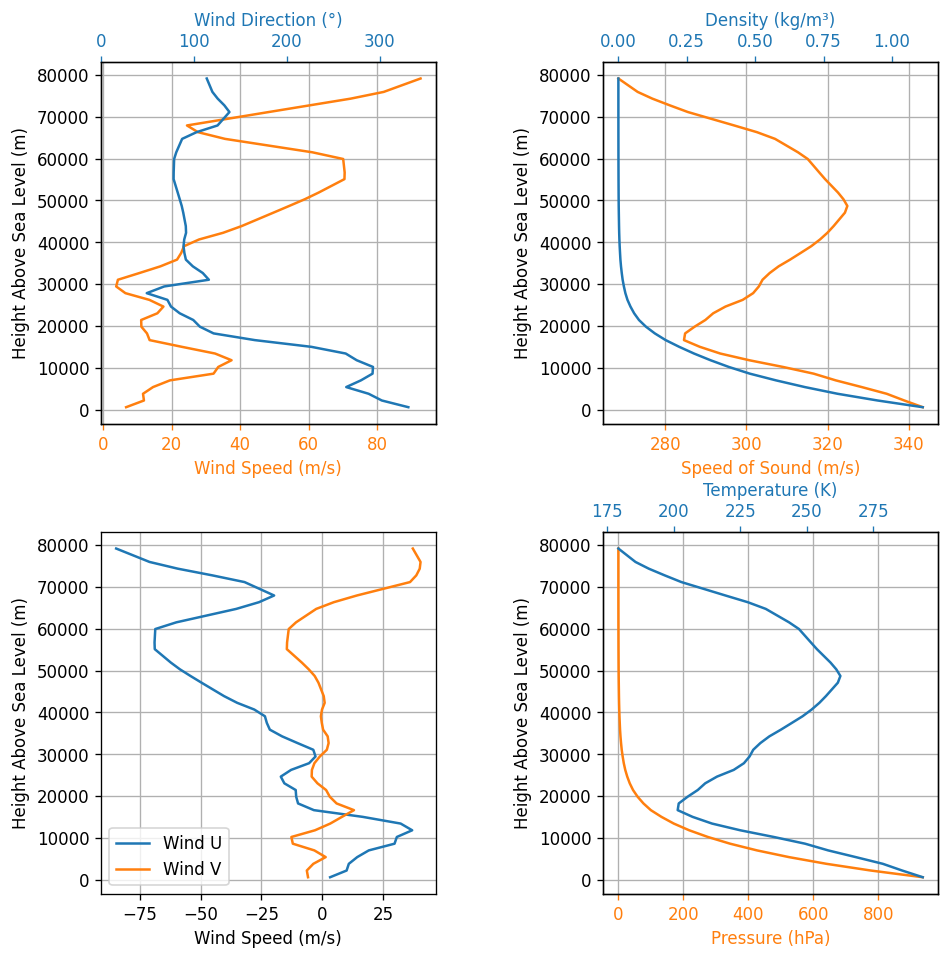

In [ ]:
## Environment

Env = Environment(railLength= 6,
                  gravity= 9.8,
                  latitude=-23.36346388888889,
                  longitude=-48.01255833333333,
                  elevation=665
                  )

Env.maxExpectedHeight = 6000

Env.setDate((2024,12,15,11)) # (year,month,day,time)

Env.setAtmosphericModel(type='Forecast', file= "GFS")

Env.allInfo()

In [ ]:
## Motor

Mandioca  = SolidMotor(thrustSource='thrustCurve.csv',
                          burnOut= 5.674,
                          reshapeThrustCurve= False,
                          grainNumber = 5,
                          grainSeparation = 6/1000,
                          grainOuterRadius = 94/2000,
                          grainInitialInnerRadius = 32/2000,
                          grainInitialHeight = 156/1000,
                          grainDensity = 1645,
                          nozzleRadius = 33.5/1000,
                          throatRadius =11.4/1000,
                          interpolationMethod='linear')

In [ ]:
## Pressure Vs Altitude

altitude_d = 3000              # Drogue deployment altitude (in m) AGL.
altitude_d_asl = altitude_d + Env.elevation   # Drogue deployment altitude (in m) ASL.

drogueDeploymentPressure = Env.pressure(altitude_d_asl)

altitude_m = 426              # Drogue deployment altitude (in m) AGL.
altitude_m_asl = altitude_m + Env.elevation   # Drogue deployment altitude (in m) ASL.

mainDeploymentPressure = Env.pressure(altitude_m_asl)

In [ ]:
## Thomas Algorithm

import SisRec
sisRecDrogue = SisRec.SisRecSt(drogueDeploymentPressure/(10**5), 0.2)
sisRecMain = SisRec.SisRecSt(mainDeploymentPressure/(10**5), 0.2)

def drogueTrigger(p, y):
    return True if sisRecDrogue.update(p/100000) == 2 else False

def mainTrigger(p, y):
    return True if sisRecMain.update(p/100000) == 3 else False

# Rocket

Data


---







In [ ]:
# Drag
PowerOff = 'MLASC2022_PowerOff_4aletas.CSV'
PowerOn = 'MLASC2022_PowerOn_4aletas.CSV'

# Fator de correção do drag nos aerofólios
fc_9013 = 1.278
fc_8014 = 1.053
fc_7017 = 2.664
fc_90EA = 1.317
fc_80EA = 1.866
fc_70EA = 2.579
fc_901  = 1.410
fc_801  = 2.007
fc_701  = 2.929

# Aerofolio
NACA0012 = 'NACA0012_completa_RE_160000.csv'

# Aerofólios de teste
NACA9013 = 'Cl x AoA/Cl x AoA - 9013.csv'
NACA8014 = 'Cl x AoA/Cl x AoA - 8014.csv'
NACA7017 = 'Cl x AoA/Cl x AoA - 7017.csv'
NACA90EA = 'Cl x AoA/Cl x AoA - 90EA.csv'
NACA80EA = 'Cl x AoA/Cl x AoA - 80EA.csv'
NACA70EA = 'Cl x AoA/Cl x AoA - 70EA.csv'
NACA901 = 'Cl x AoA/Cl x AoA - 901.csv'
NACA801 = 'Cl x AoA/Cl x AoA - 801.csv'
NACA701 = 'Cl x AoA/Cl x AoA - 701.csv'


# NACA0012

In [ ]:

Grains_CM_position = 2621.565/1000
Fins_position  = (3152-204)/1000
Tail_position   = 3152/1000
Nozzle_position  = 3222.5/1000
UnloadedRocket_CM_position = 2009/1000
Nose_lenght = 558.292/1000

# Now the cordinates system has the origin defined at the unloaded rocket center of mass

Juno = Rocket(motor = Mandioca,
                 radius = 127/2000,
                 mass = 22337/1000,
                 inertiaI = 13.75,
                 inertiaZ = 0.06605,
                 distanceRocketNozzle = -abs(UnloadedRocket_CM_position - Nozzle_position),
                 distanceRocketPropellant = -abs(UnloadedRocket_CM_position - Grains_CM_position),
                 powerOffDrag = PowerOff,   # Drag curve with the motor turned off
                 powerOnDrag = PowerOn)     # Drag curve with the motor turned on

Juno.addNose(length = Nose_lenght, kind = "vonKarman", distanceToCM = abs(UnloadedRocket_CM_position-Nose_lenght))

Juno.addFins(n = 4,span = 0.13, rootChord = 0.160, tipChord=0.09, distanceToCM = (UnloadedRocket_CM_position - Fins_position), airfoil=(NACA0012,"radians"))


Juno.addTail(topRadius = 127/2000, bottomRadius = 102.992/2000, length = 71.5/1000, distanceToCM=-abs(Tail_position-UnloadedRocket_CM_position))

FirstRailButton_position = 1730/1000
SecondRailButton_position = 3142.5/1000
Juno.setRailButtons([UnloadedRocket_CM_position - FirstRailButton_position, UnloadedRocket_CM_position - SecondRailButton_position], 60)

# Parachutes:
Drogue = Juno.addParachute('Drogue',
                     CdS=0.921,
                     trigger = drogueTrigger,
                     samplingRate = 105,
                     noise = (0, 8.3, 0.5),
                     lag=1.0)

Main = Juno.addParachute('Main',
                     CdS = 6.015,
                     trigger = mainTrigger,
                     samplingRate = 105,
                     noise = (0, 8.3, 0.5),
                     lag = 1.0)


Corrector = 0.4624/Juno.powerOffDrag(0.6)
Juno.powerOnDrag *= Corrector
Juno.powerOffDrag *= Corrector

## Trajectory

In [ ]:
sisRecDrogue.reset()
sisRecDrogue.enable()
sisRecMain.reset()
sisRecMain.enable()

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 626.77 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: -0.965 | e1: 0.042 | e2: 0.011 | e3: -0.259
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: -330.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 330.00°


Surface Wind Conditions

Frontal Surface Wind Speed: -6.68 m/s
Lateral Surface Wind Speed: 0.05 m/s


 Rail Departure State

Rail Departure Time: 0.897 s
Rail Departure Velocity: 18.759 m/s
Rail Departure Static Margin: 2.466 c
Rail Departure Angle of Attack: 19.125°
Rail Departure Thrust-Weight Ratio: 5.894
Rail Departure Reynolds Number: 1.593e+05


BurnOut State

BurnOut time: 5.674 s
Altitude at burnOut: 818.927 m (AGL)
Rocket velocity at burnOut: 274.709 m/s
Freestream velocity at burnOut: 278.116 m/s
Mach Number at burnOut: 0.816
Kinetic energy at burnOut: 8.427e+05 J


Apog

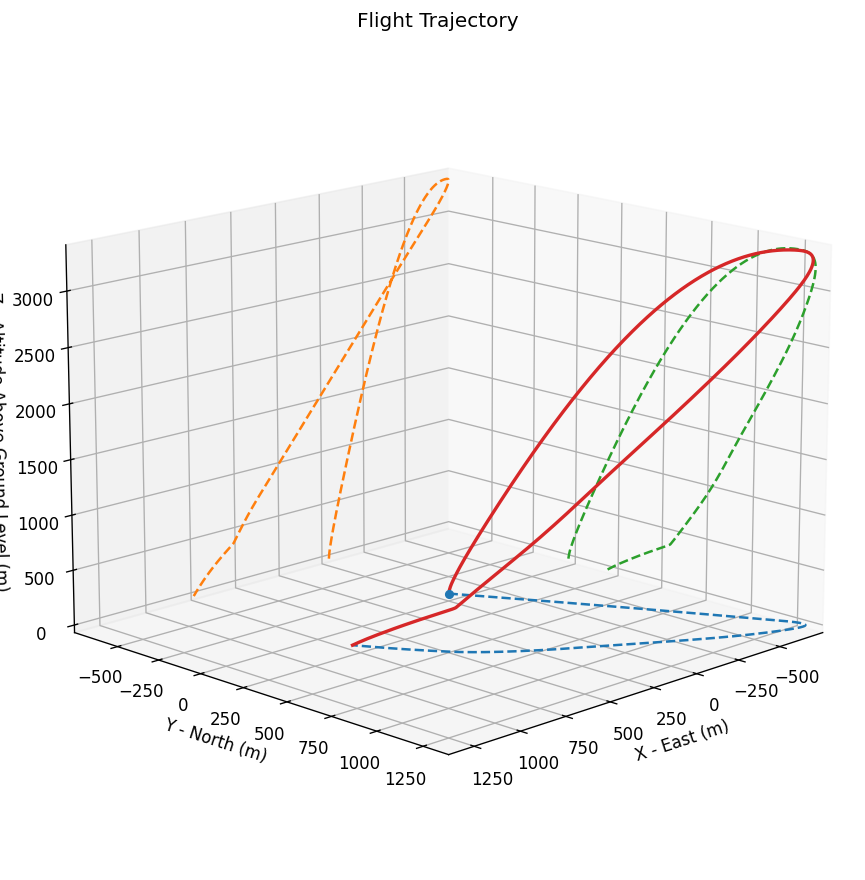



Trajectory Kinematic Plots



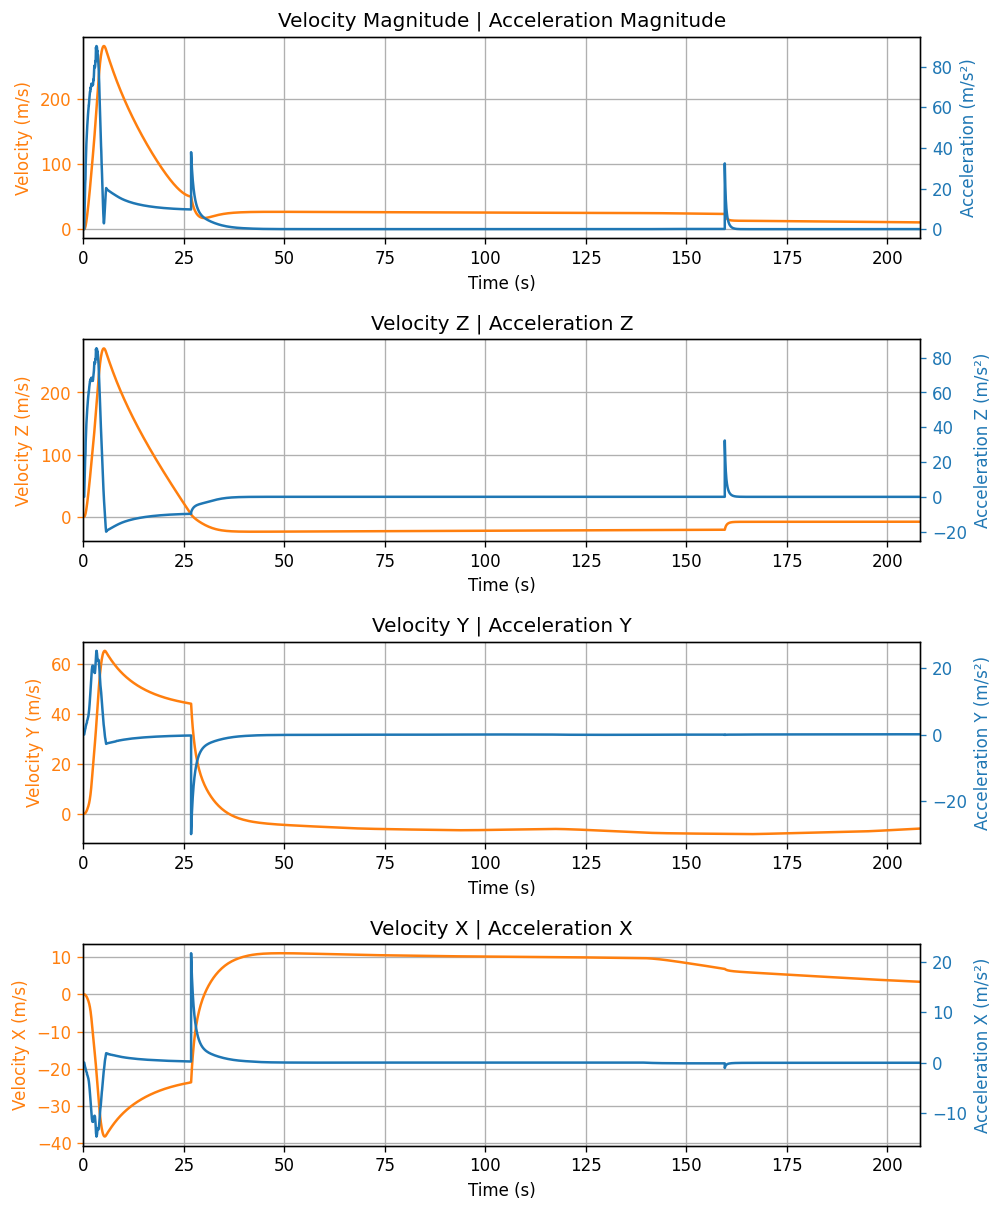



Angular Position Plots



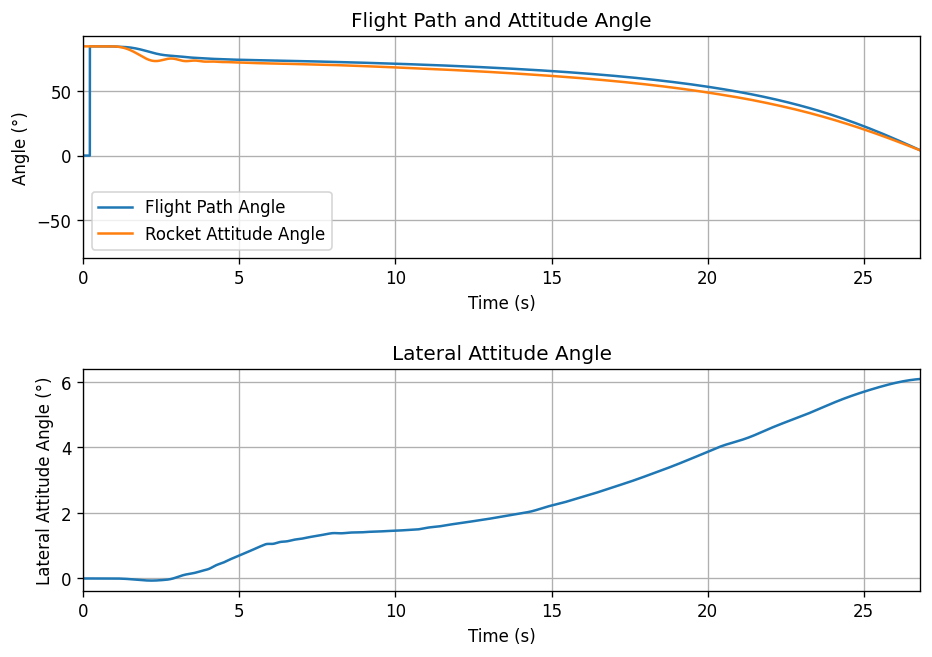



Path, Attitude and Lateral Attitude Angle plots



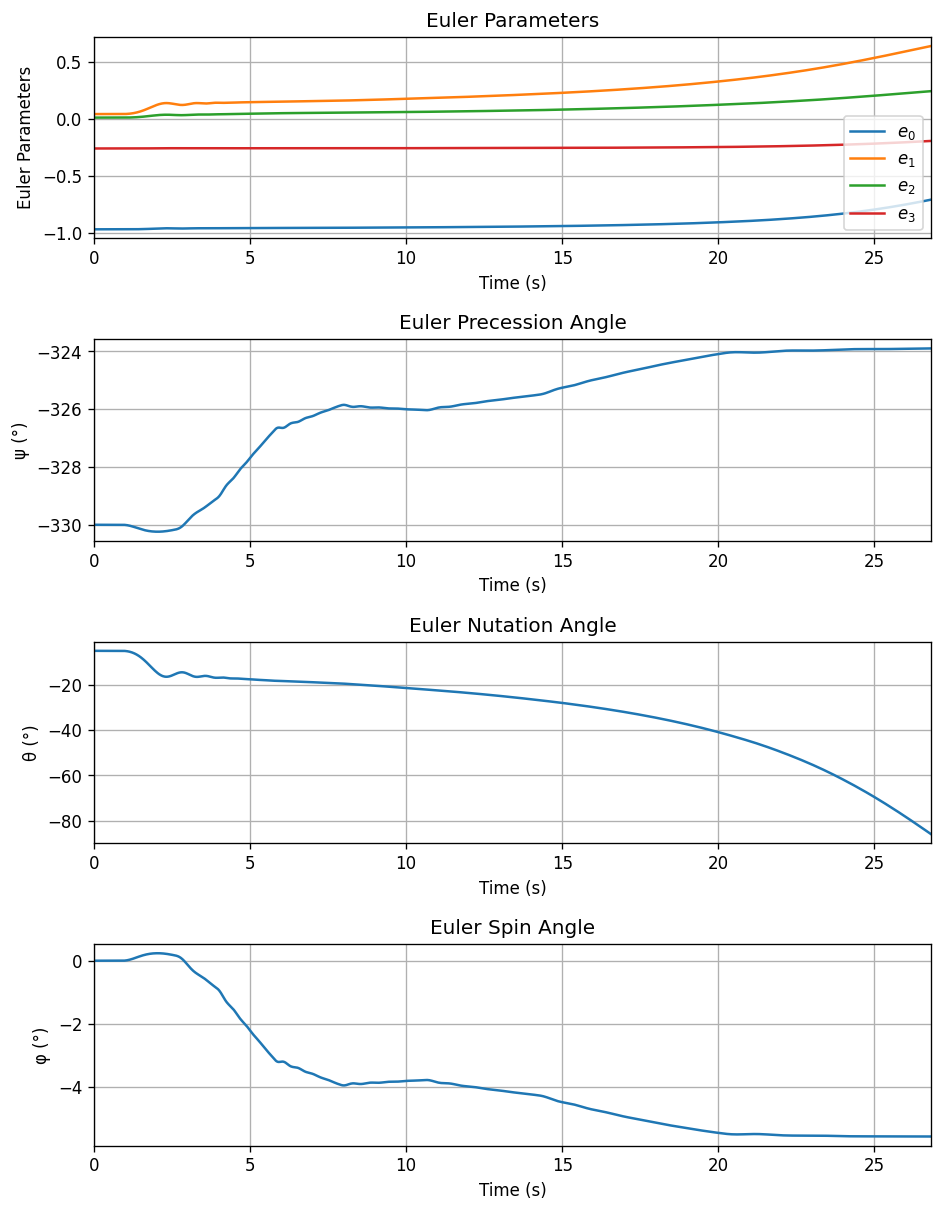



Trajectory Angular Velocity and Acceleration Plots



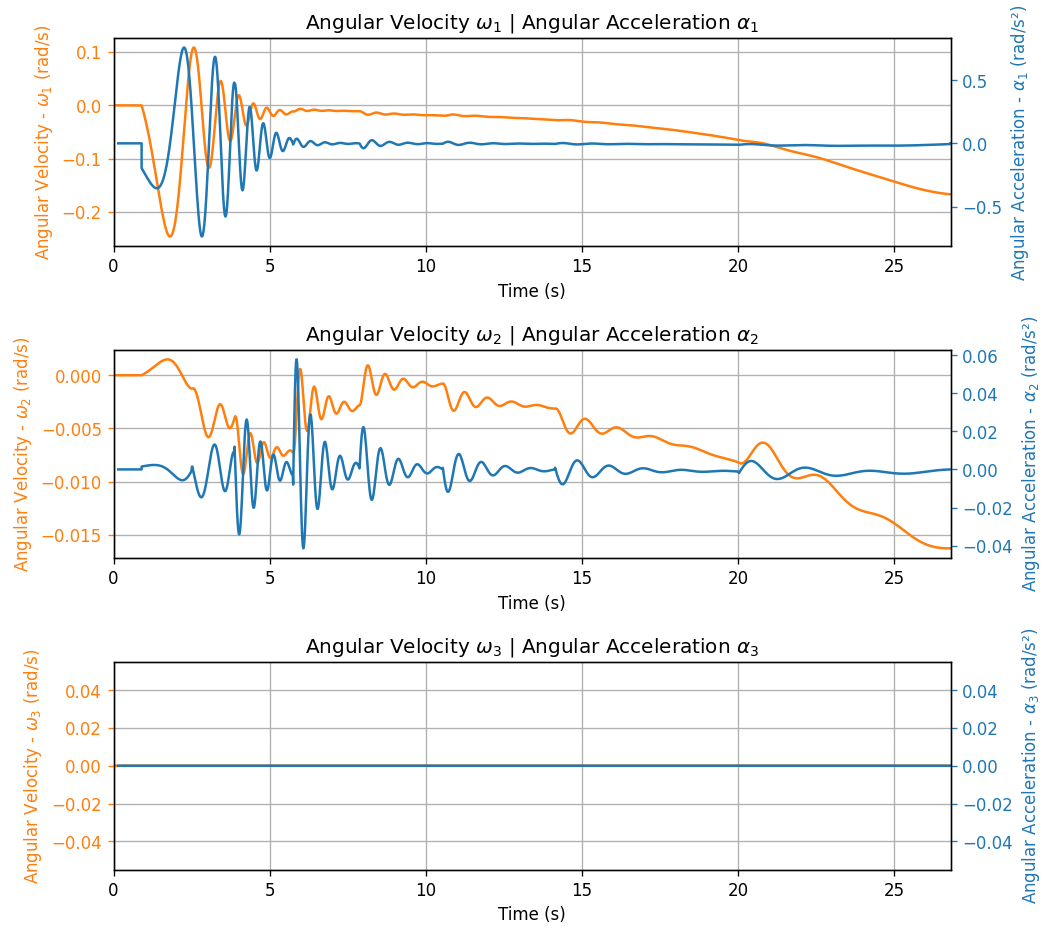



Trajectory Force Plots



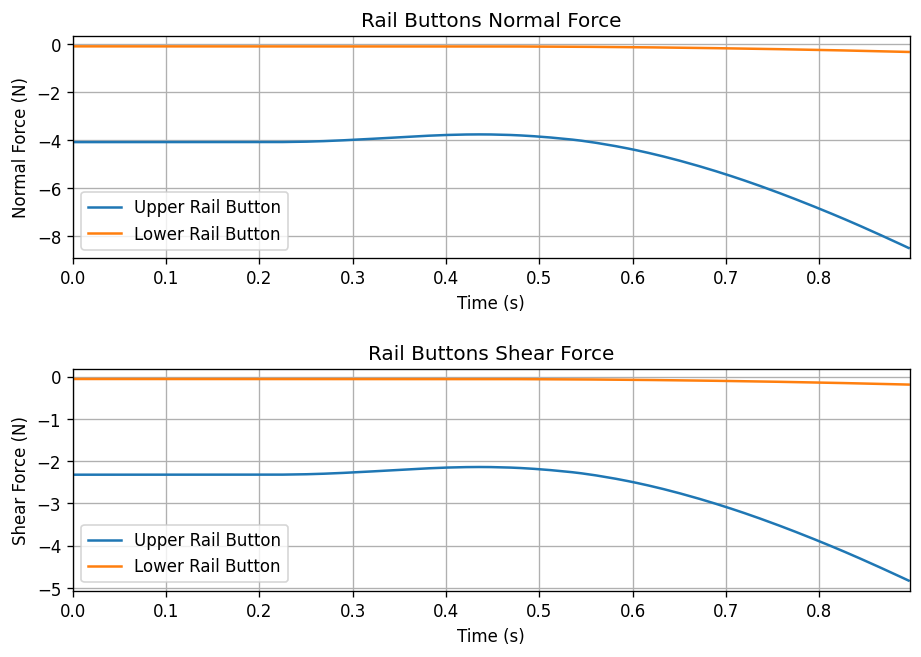

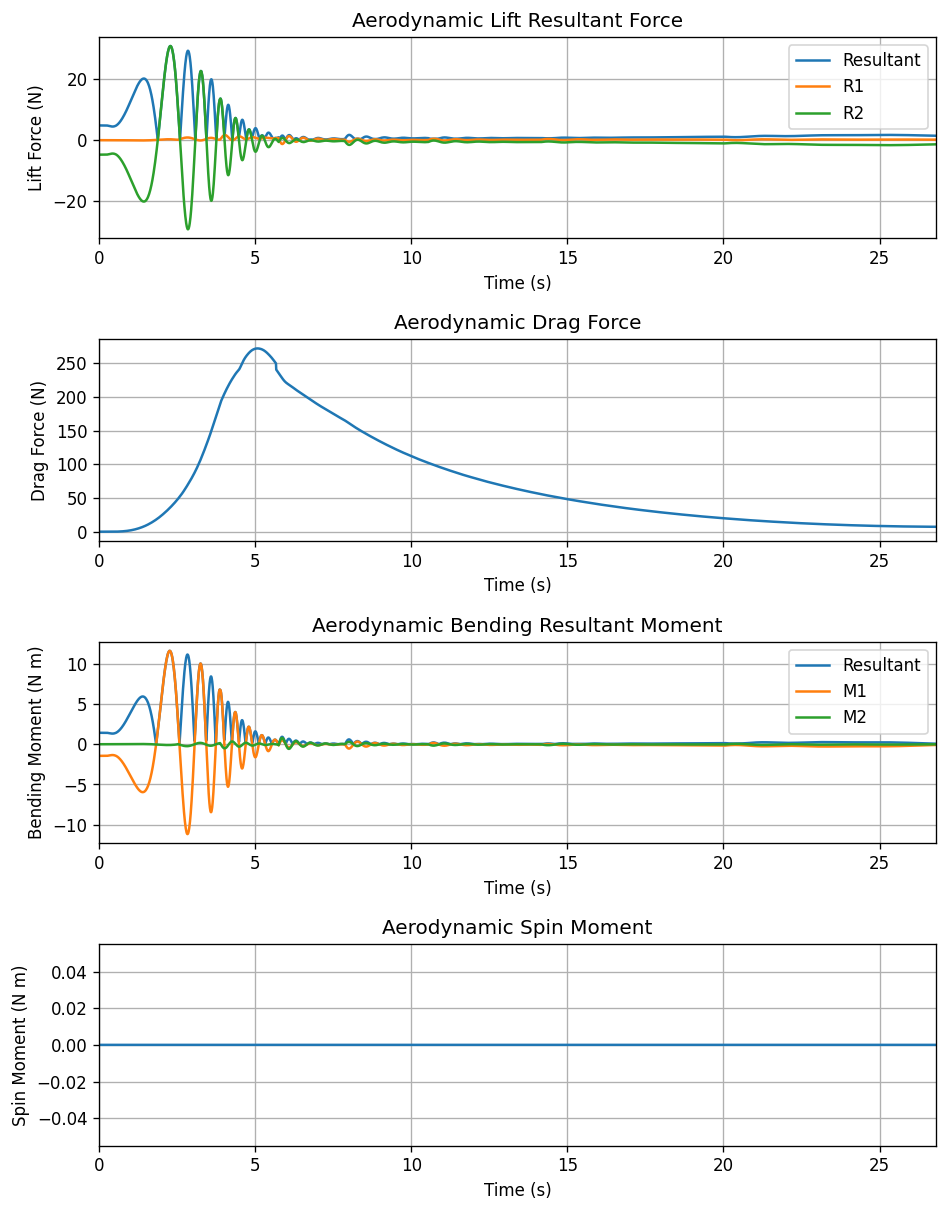



Trajectory Energy Plots



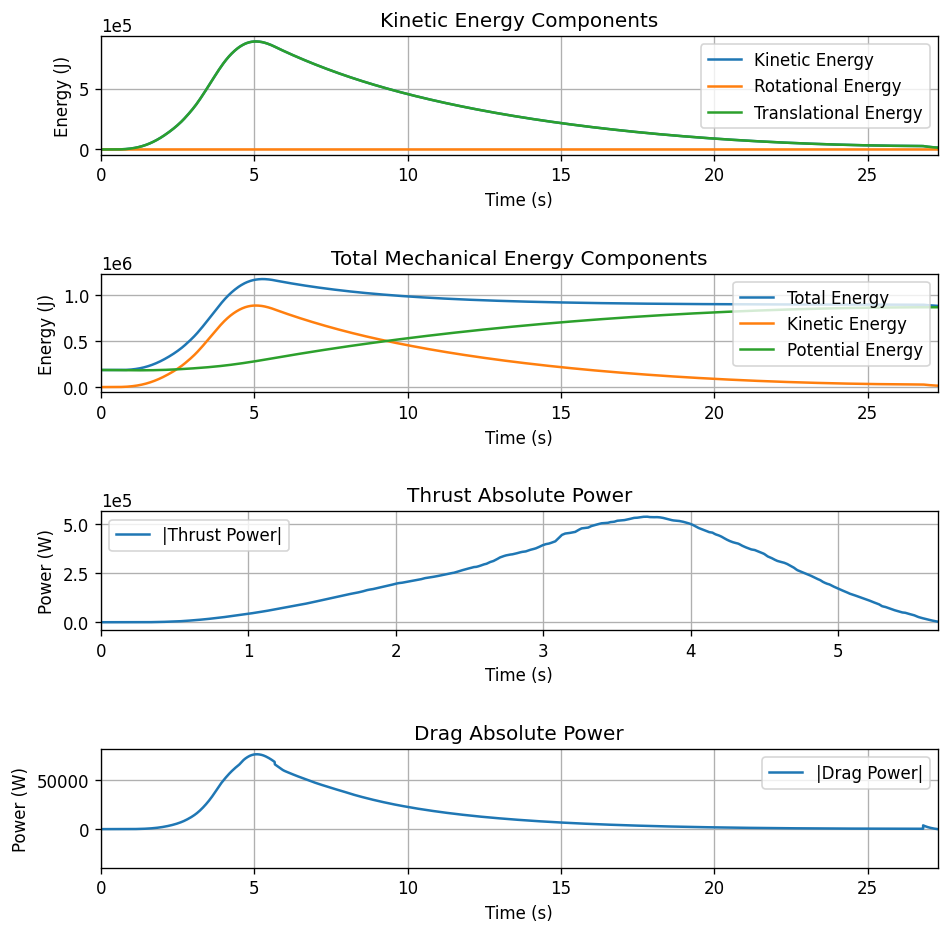



Trajectory Fluid Mechanics Plots



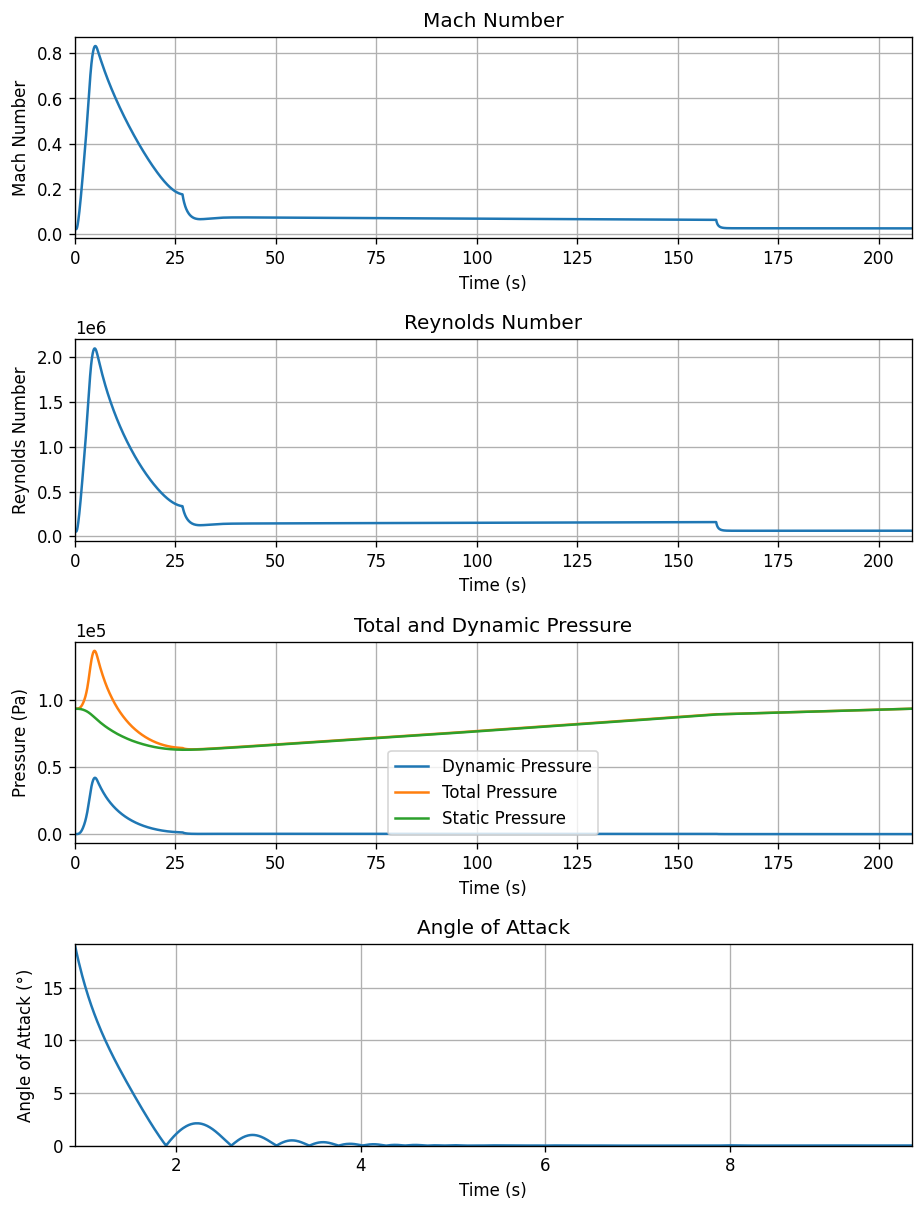



Trajectory Stability and Control Plots



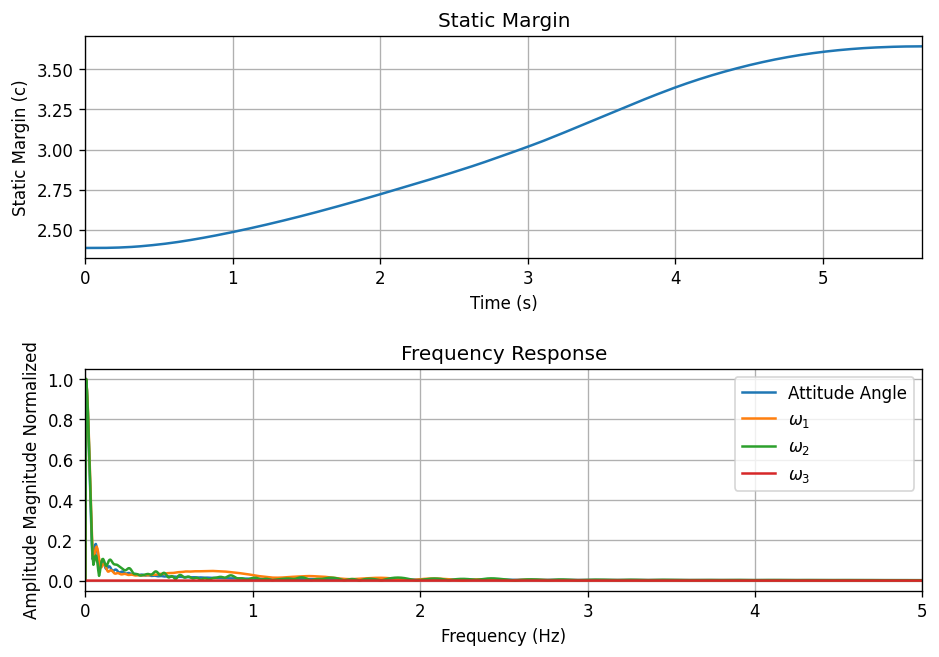

In [ ]:
test_flight = Flight(rocket=Juno, environment=Env, inclination=85, heading=330, rtol=1e-6, atol=1e-6, maxTime=600)
test_flight.allInfo()

# 901

In [ ]:

Grains_CM_position = 2621.565/1000
Fins_position  = (3152-204)/1000
Tail_position   = 3152/1000
Nozzle_position  = 3222.5/1000
UnloadedRocket_CM_position = 2009/1000
Nose_lenght = 558.292/1000

# Now the cordinates system has the origin defined at the unloaded rocket center of mass

Juno = Rocket(motor = Mandioca,
                 radius = 127/2000,
                 mass = 22337/1000,
                 inertiaI = 13.75,
                 inertiaZ = 0.06605,
                 distanceRocketNozzle = -abs(UnloadedRocket_CM_position - Nozzle_position),
                 distanceRocketPropellant = -abs(UnloadedRocket_CM_position - Grains_CM_position),
                 powerOffDrag = PowerOff,   # Drag curve with the motor turned off
                 powerOnDrag = PowerOn)     # Drag curve with the motor turned on

Juno.addNose(length = Nose_lenght, kind = "vonKarman", distanceToCM = abs(UnloadedRocket_CM_position-Nose_lenght))

Juno.addFins(n = 4,span = 0.13, rootChord = 0.160, tipChord=0.09, distanceToCM = (UnloadedRocket_CM_position - Fins_position), airfoil=(NACA901,"degrees"))


Juno.addTail(topRadius = 127/2000, bottomRadius = 102.992/2000, length = 71.5/1000, distanceToCM=-abs(Tail_position-UnloadedRocket_CM_position))

FirstRailButton_position = 1730/1000
SecondRailButton_position = 3142.5/1000
Juno.setRailButtons([UnloadedRocket_CM_position - FirstRailButton_position, UnloadedRocket_CM_position - SecondRailButton_position], 60)

# Parachutes:
Drogue = Juno.addParachute('Drogue',
                     CdS=0.921,
                     trigger = drogueTrigger,
                     samplingRate = 105,
                     noise = (0, 8.3, 0.5),
                     lag=1.0)

Main = Juno.addParachute('Main',
                     CdS = 6.015,
                     trigger = mainTrigger,
                     samplingRate = 105,
                     noise = (0, 8.3, 0.5),
                     lag = 1.0)


Corrector = 0.4624/Juno.powerOffDrag(0.6)
Juno.powerOnDrag *= Corrector
Juno.powerOffDrag *= Corrector

Juno.powerOnDrag *= (Juno.powerOnDrag * 0.6) + (Juno.powerOnDrag * 0.4 * fc_901)
Juno.powerOffDrag *= (Juno.powerOffDrag * 0.6) + (Juno.powerOffDrag * 0.4 * fc_901)


## Trajectory

In [ ]:
sisRecDrogue.reset()
sisRecDrogue.enable()
sisRecMain.reset()
sisRecMain.enable()

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 626.77 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: -0.965 | e1: 0.042 | e2: 0.011 | e3: -0.259
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: -330.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 330.00°


Surface Wind Conditions

Frontal Surface Wind Speed: -6.68 m/s
Lateral Surface Wind Speed: 0.05 m/s


 Rail Departure State

Rail Departure Time: 0.897 s
Rail Departure Velocity: 18.761 m/s
Rail Departure Static Margin: 2.634 c
Rail Departure Angle of Attack: 19.123°
Rail Departure Thrust-Weight Ratio: 5.894
Rail Departure Reynolds Number: 1.593e+05


BurnOut State

BurnOut time: 5.674 s
Altitude at burnOut: 831.639 m (AGL)
Rocket velocity at burnOut: 284.856 m/s
Freestream velocity at burnOut: 288.336 m/s
Mach Number at burnOut: 0.846
Kinetic energy at burnOut: 9.062e+05 J


Apog

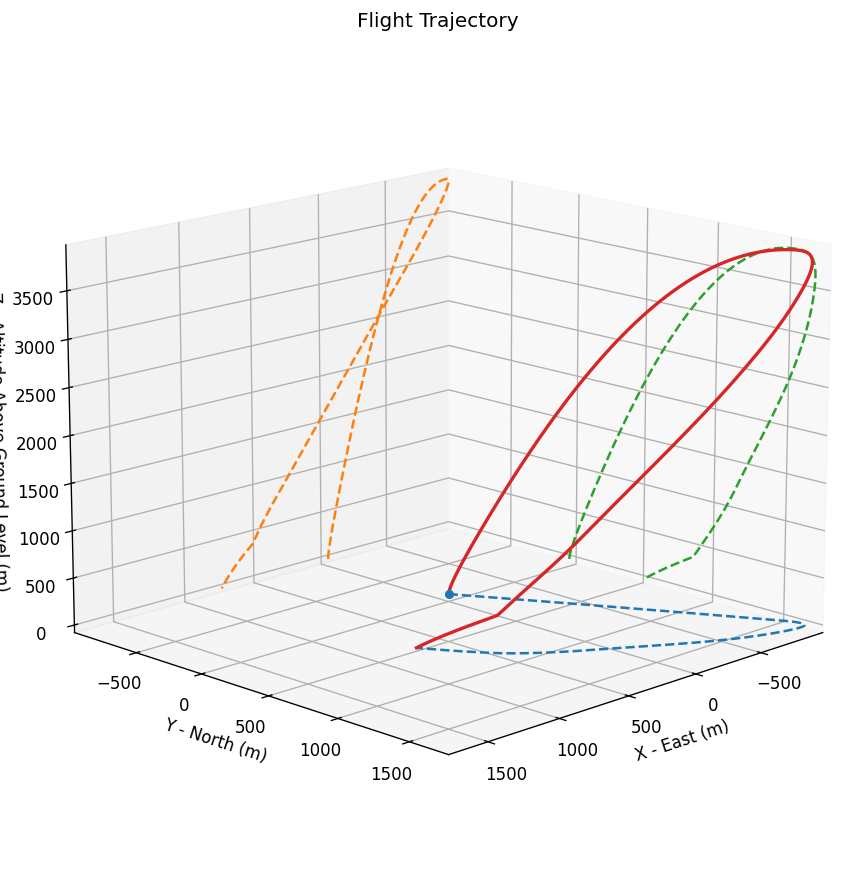



Trajectory Kinematic Plots



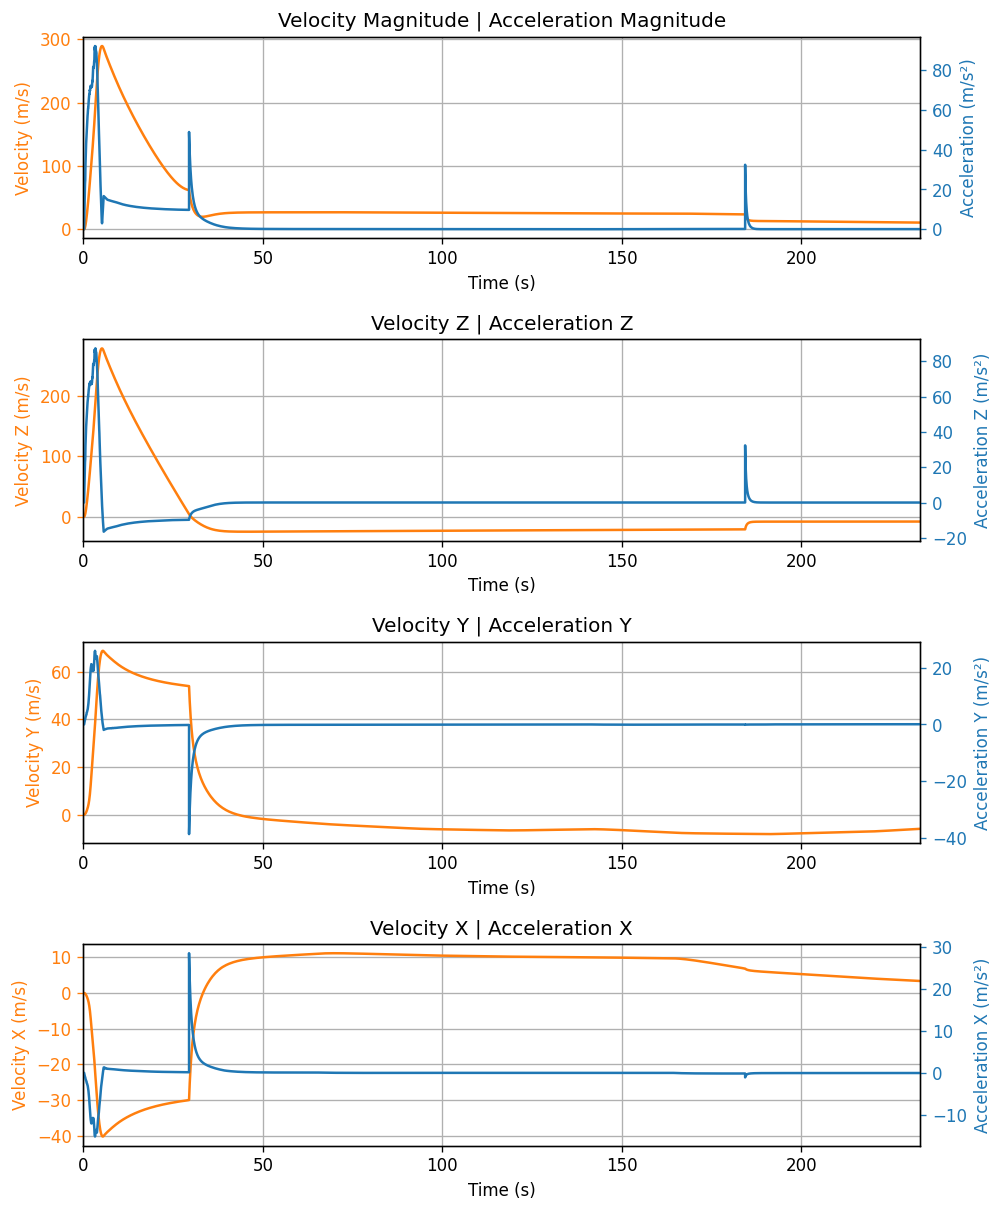



Angular Position Plots



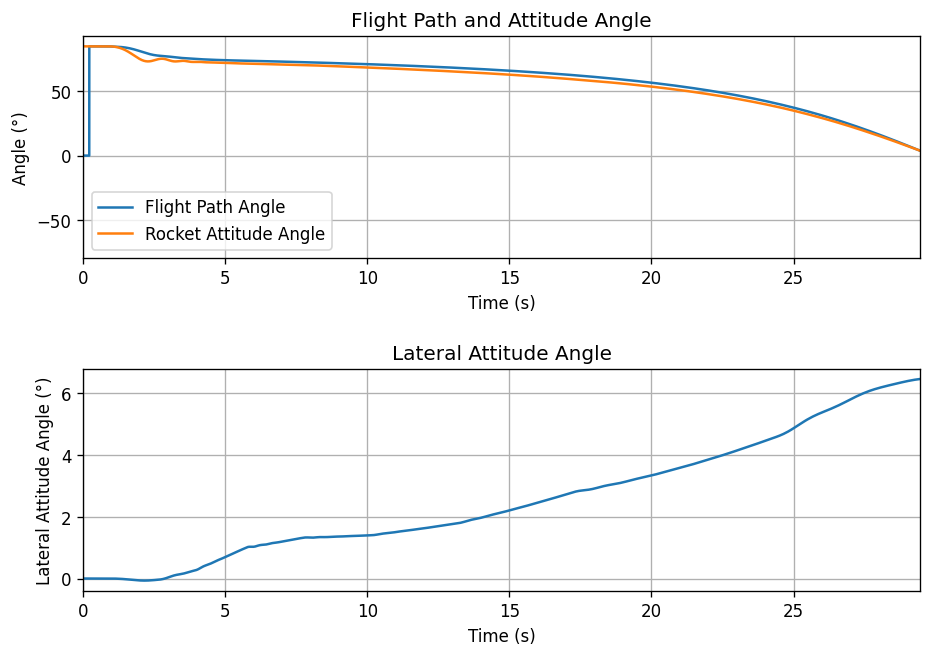



Path, Attitude and Lateral Attitude Angle plots



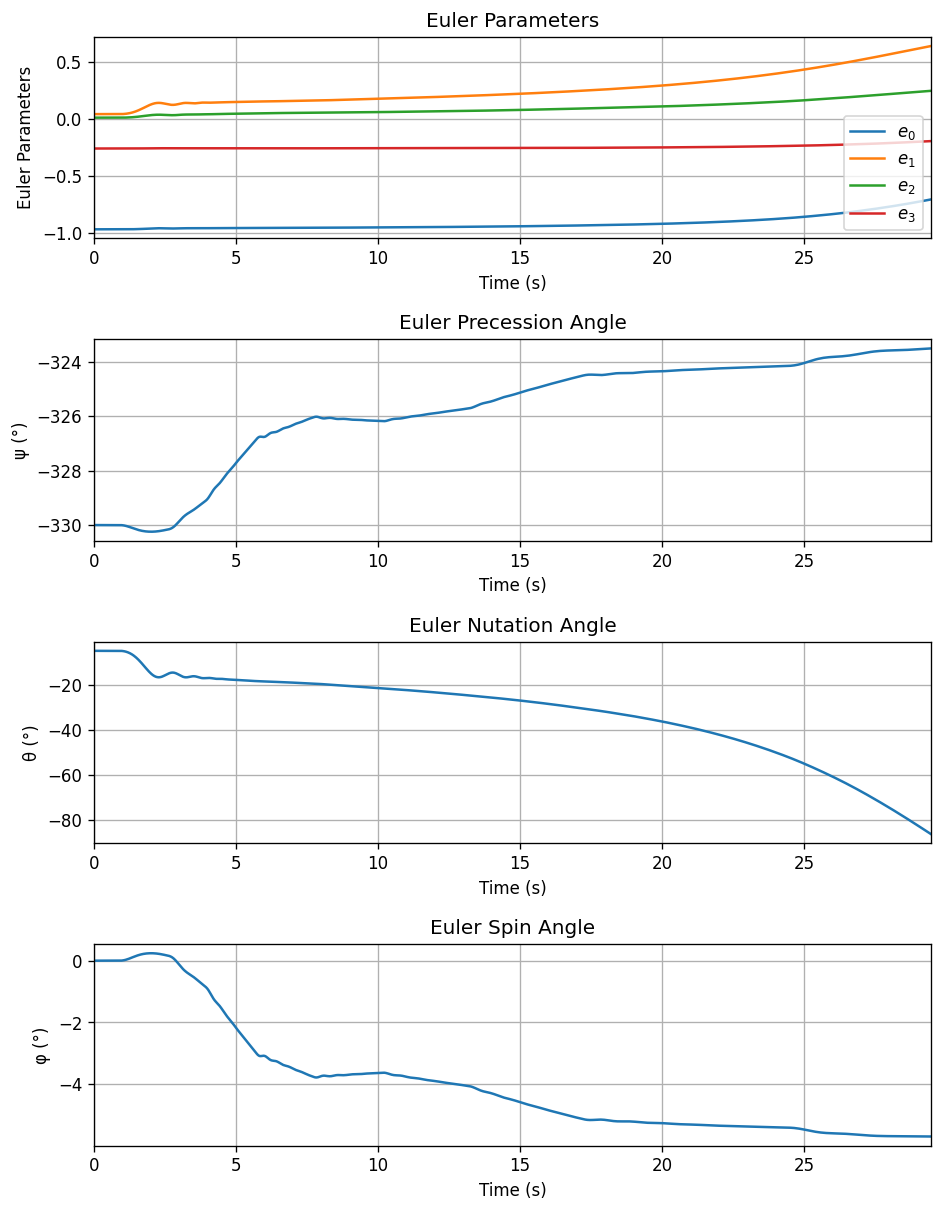



Trajectory Angular Velocity and Acceleration Plots



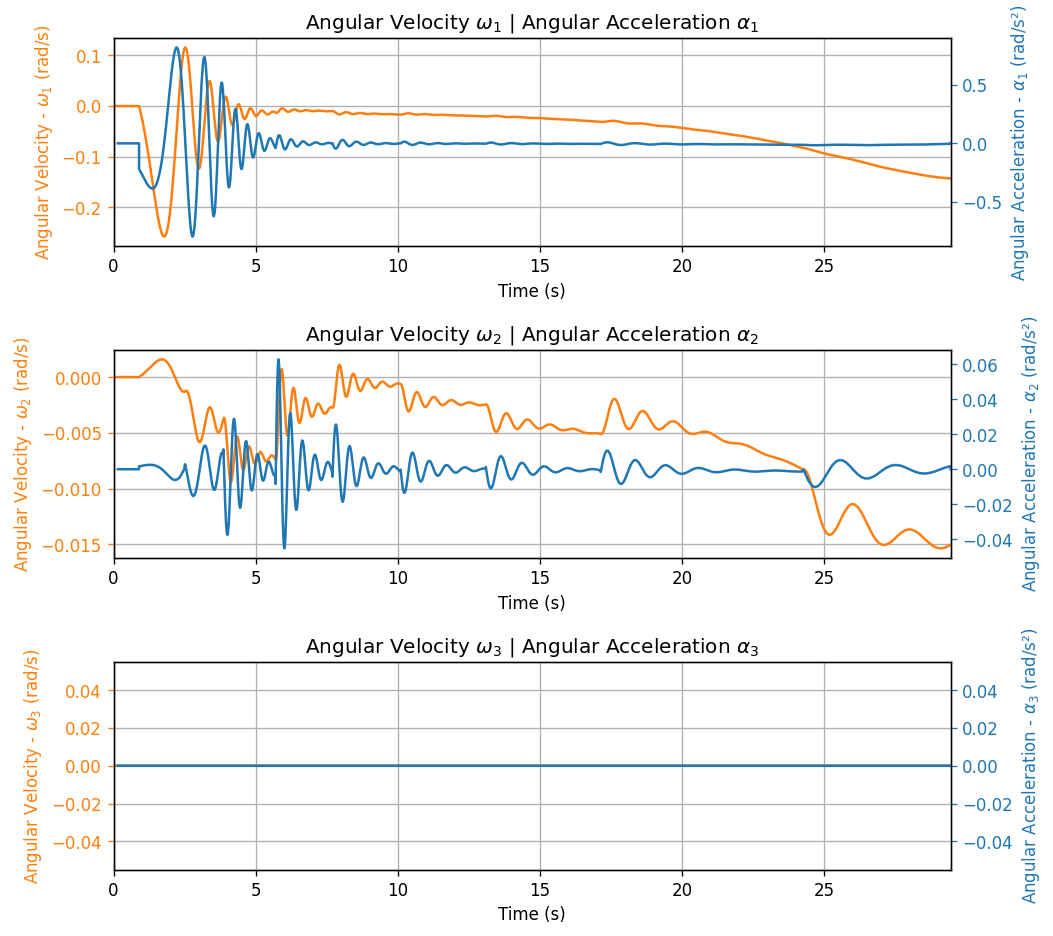



Trajectory Force Plots



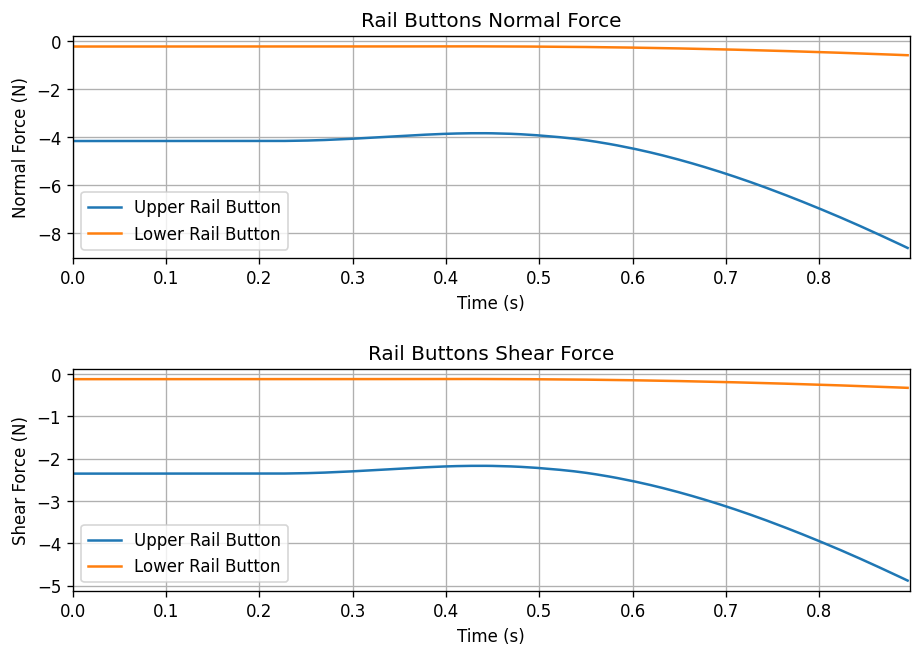

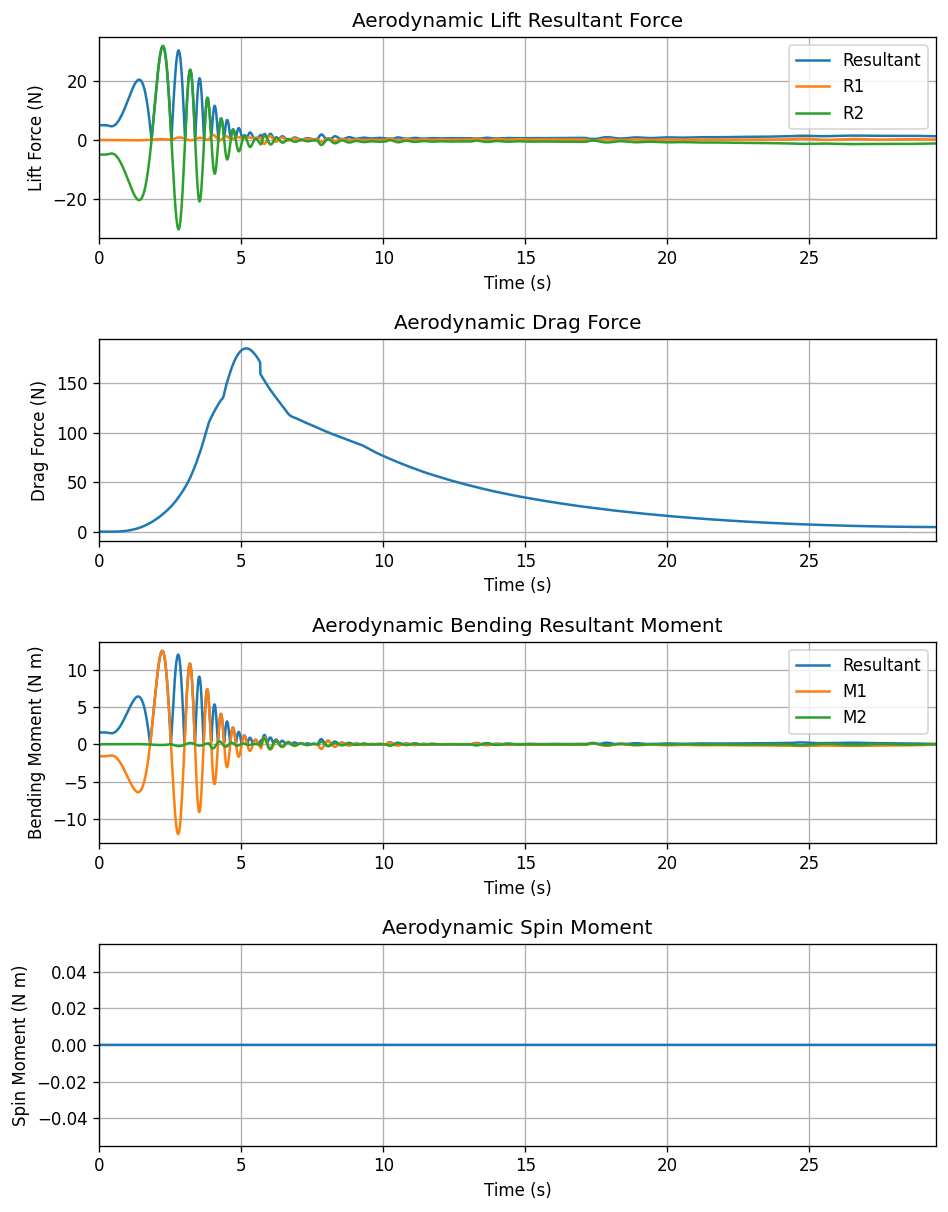



Trajectory Energy Plots



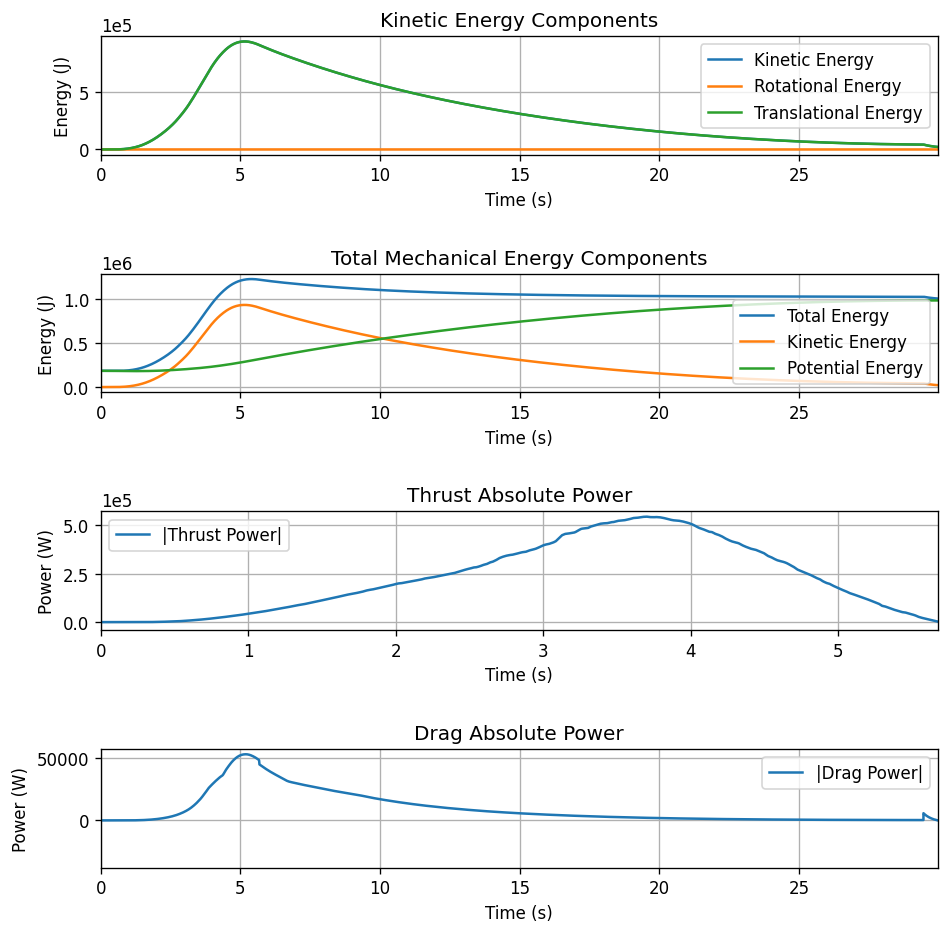



Trajectory Fluid Mechanics Plots



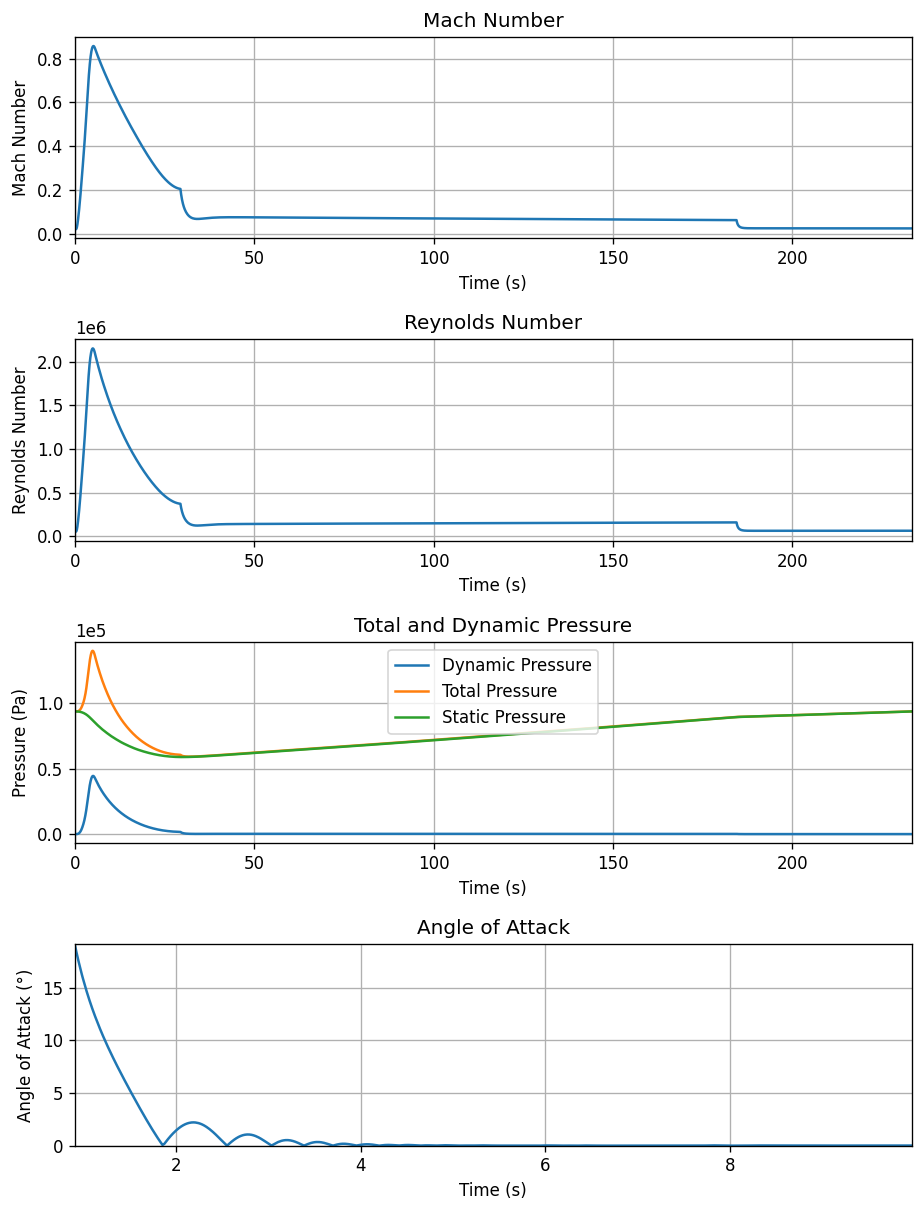



Trajectory Stability and Control Plots



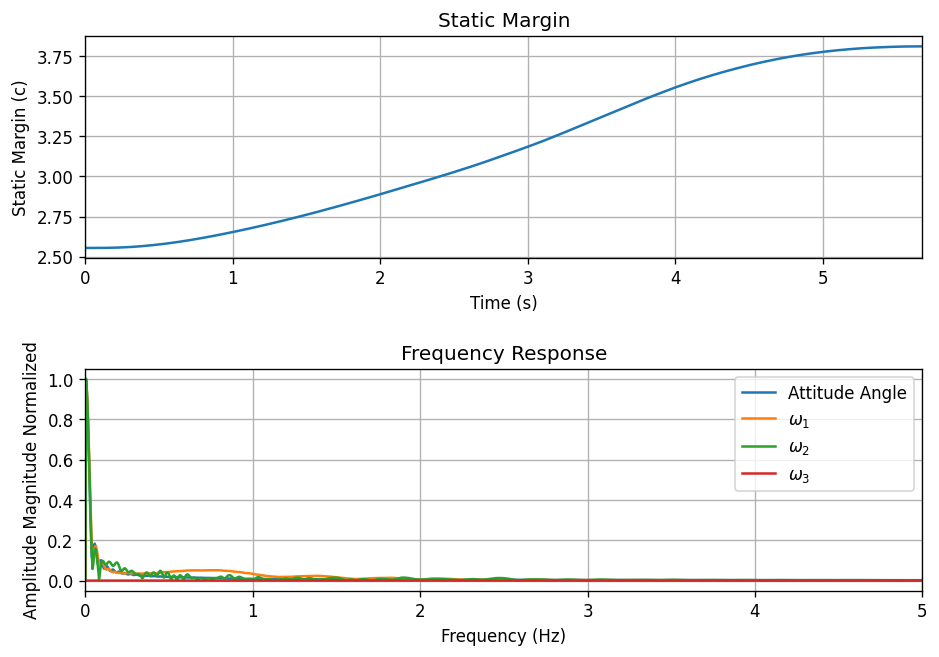

In [ ]:
test_flight = Flight(rocket=Juno, environment=Env, inclination=85, heading=330, rtol=1e-6, atol=1e-6, maxTime=600)
test_flight.allInfo()

# 801

In [ ]:

Grains_CM_position = 2621.565/1000
Fins_position  = (3152-204)/1000
Tail_position   = 3152/1000
Nozzle_position  = 3222.5/1000
UnloadedRocket_CM_position = 2009/1000
Nose_lenght = 558.292/1000

# Now the cordinates system has the origin defined at the unloaded rocket center of mass

Juno = Rocket(motor = Mandioca,
                 radius = 127/2000,
                 mass = 22337/1000,
                 inertiaI = 13.75,
                 inertiaZ = 0.06605,
                 distanceRocketNozzle = -abs(UnloadedRocket_CM_position - Nozzle_position),
                 distanceRocketPropellant = -abs(UnloadedRocket_CM_position - Grains_CM_position),
                 powerOffDrag = PowerOff,   # Drag curve with the motor turned off
                 powerOnDrag = PowerOn)     # Drag curve with the motor turned on

Juno.addNose(length = Nose_lenght, kind = "vonKarman", distanceToCM = abs(UnloadedRocket_CM_position-Nose_lenght))

Juno.addFins(n = 4,span = 0.13, rootChord = 0.160, tipChord=0.09, distanceToCM = (UnloadedRocket_CM_position - Fins_position), airfoil=(NACA801,"degrees"))


Juno.addTail(topRadius = 127/2000, bottomRadius = 102.992/2000, length = 71.5/1000, distanceToCM=-abs(Tail_position-UnloadedRocket_CM_position))

FirstRailButton_position = 1730/1000
SecondRailButton_position = 3142.5/1000
Juno.setRailButtons([UnloadedRocket_CM_position - FirstRailButton_position, UnloadedRocket_CM_position - SecondRailButton_position], 60)

# Parachutes:
Drogue = Juno.addParachute('Drogue',
                     CdS=0.921,
                     trigger = drogueTrigger,
                     samplingRate = 105,
                     noise = (0, 8.3, 0.5),
                     lag=1.0)

Main = Juno.addParachute('Main',
                     CdS = 6.015,
                     trigger = mainTrigger,
                     samplingRate = 105,
                     noise = (0, 8.3, 0.5),
                     lag = 1.0)


Corrector = 0.4624/Juno.powerOffDrag(0.6)
Juno.powerOnDrag *= Corrector
Juno.powerOffDrag *= Corrector

Juno.powerOnDrag *= (Juno.powerOnDrag * 0.6) + (Juno.powerOnDrag * 0.4 * fc_801)
Juno.powerOffDrag *= (Juno.powerOffDrag * 0.6) + (Juno.powerOffDrag * 0.4 * fc_801)

## Trajectory

In [ ]:
sisRecDrogue.reset()
sisRecDrogue.enable()
sisRecMain.reset()
sisRecMain.enable()

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 626.77 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: -0.965 | e1: 0.042 | e2: 0.011 | e3: -0.259
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: -330.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 330.00°


Surface Wind Conditions

Frontal Surface Wind Speed: -6.68 m/s
Lateral Surface Wind Speed: 0.05 m/s


 Rail Departure State

Rail Departure Time: 0.897 s
Rail Departure Velocity: 18.760 m/s
Rail Departure Static Margin: 2.633 c
Rail Departure Angle of Attack: 19.124°
Rail Departure Thrust-Weight Ratio: 5.894
Rail Departure Reynolds Number: 1.593e+05


BurnOut State

BurnOut time: 5.674 s
Altitude at burnOut: 828.054 m (AGL)
Rocket velocity at burnOut: 281.950 m/s
Freestream velocity at burnOut: 285.426 m/s
Mach Number at burnOut: 0.837
Kinetic energy at burnOut: 8.878e+05 J


Apog

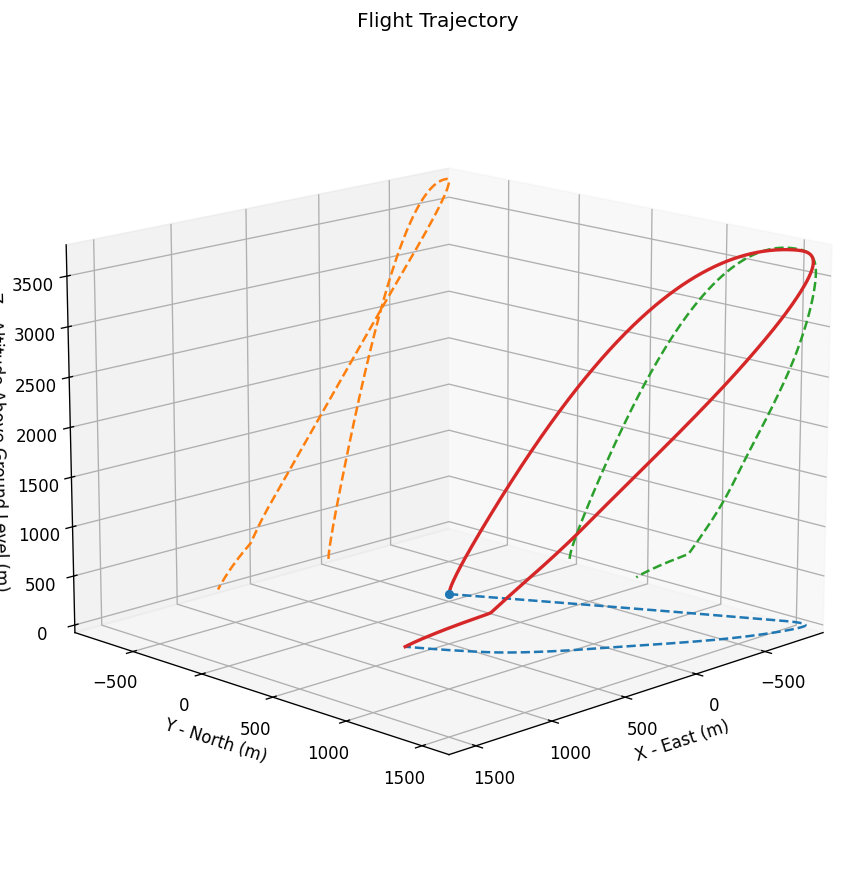



Trajectory Kinematic Plots



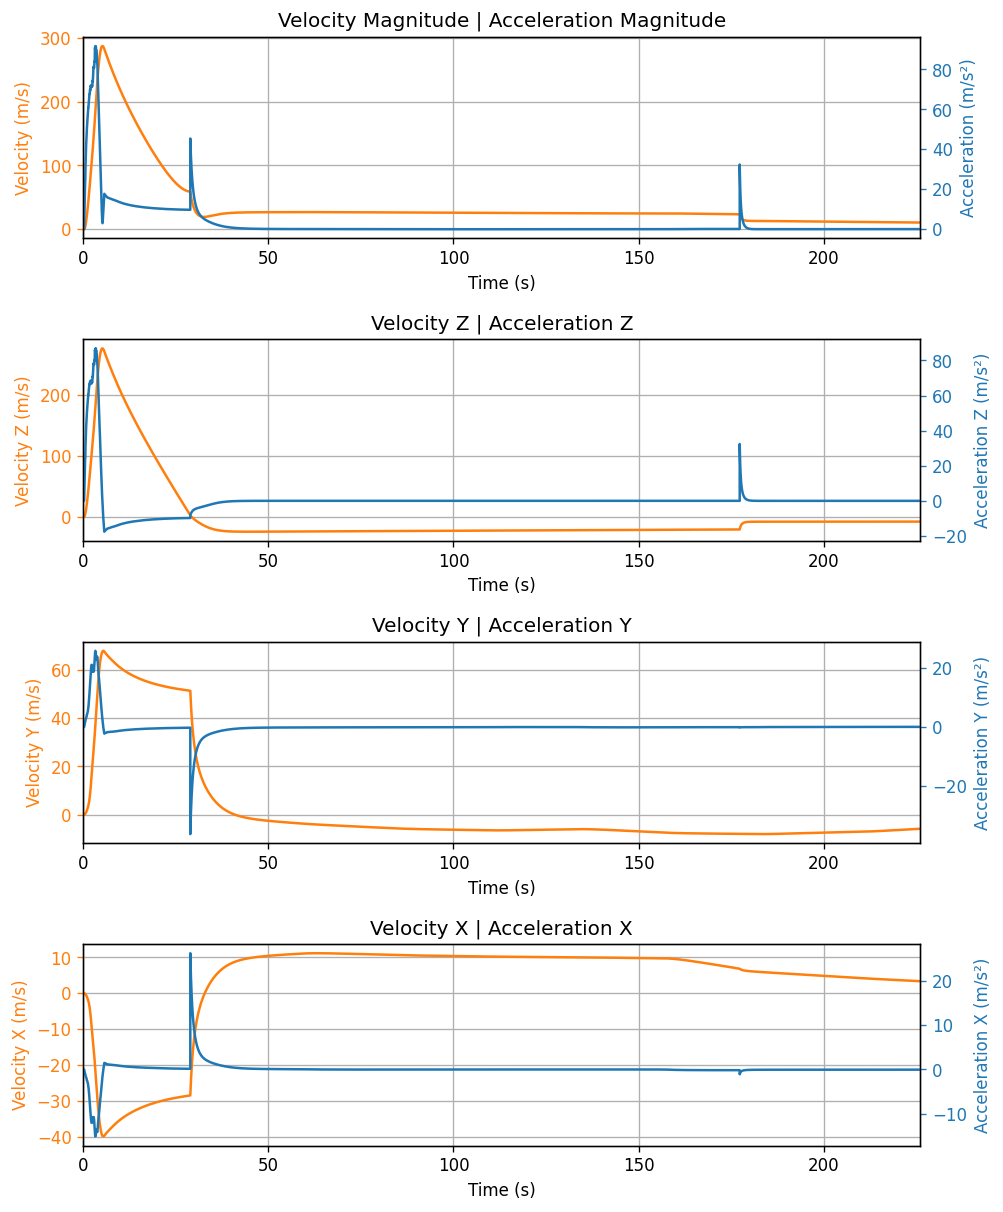



Angular Position Plots



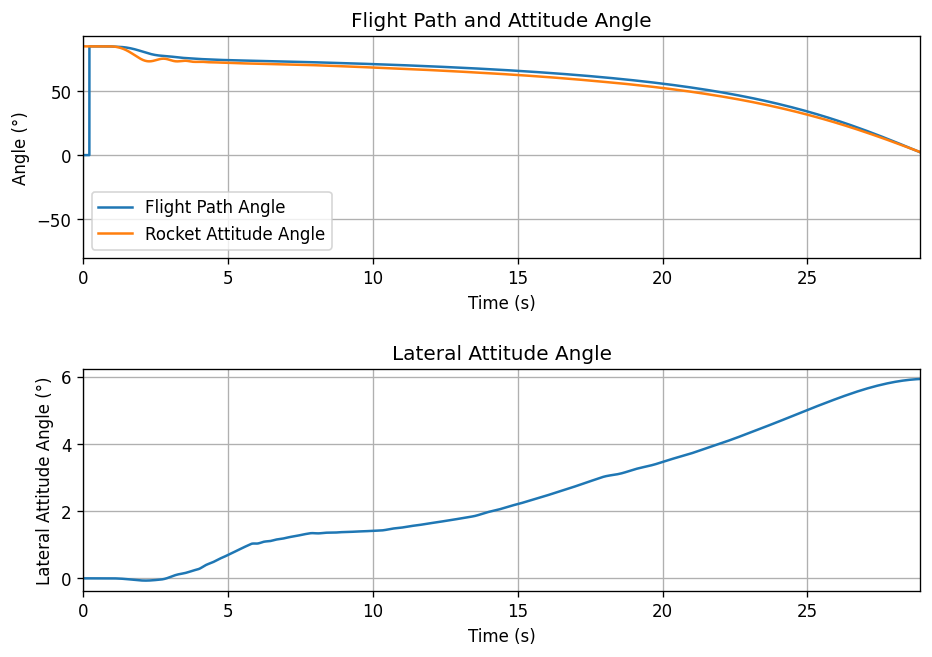



Path, Attitude and Lateral Attitude Angle plots



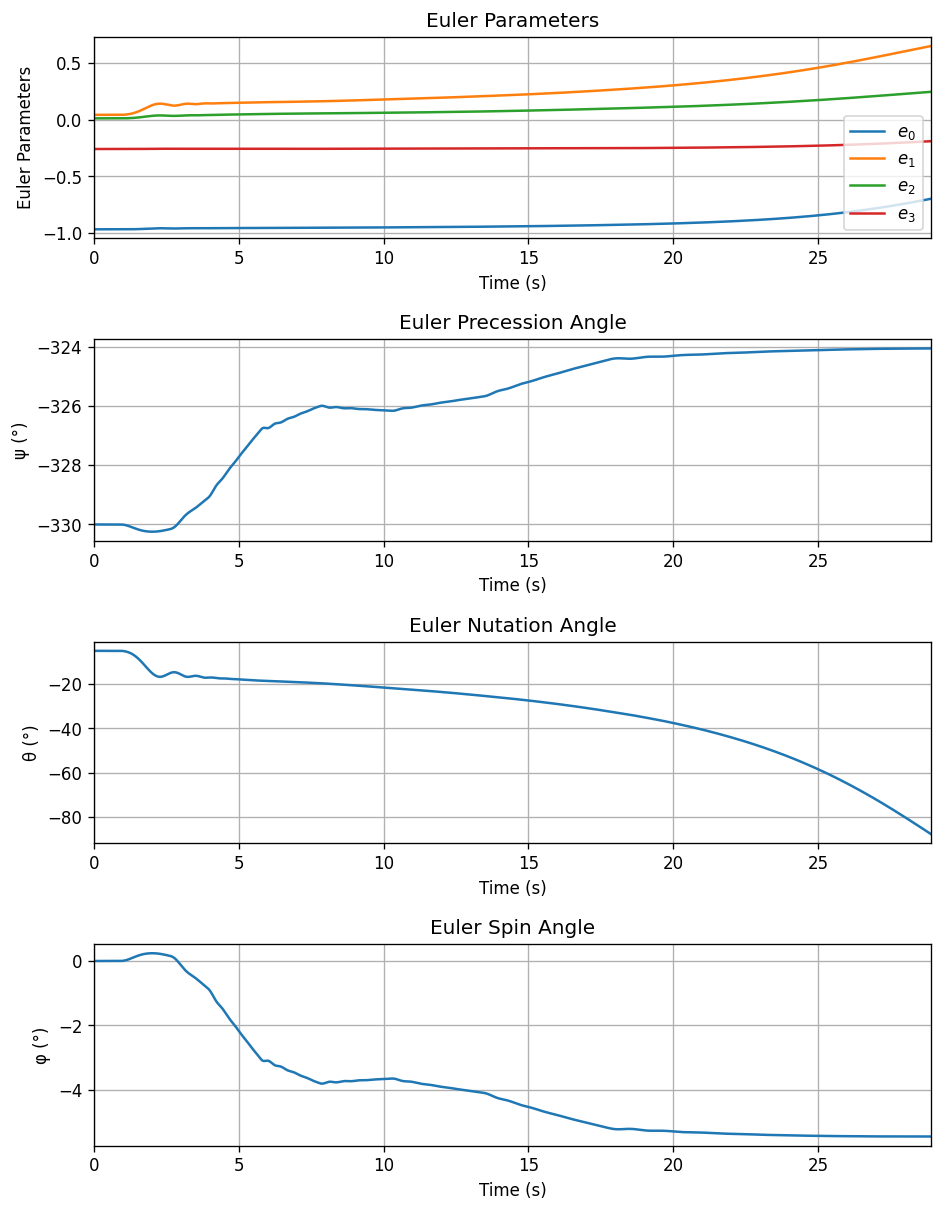



Trajectory Angular Velocity and Acceleration Plots



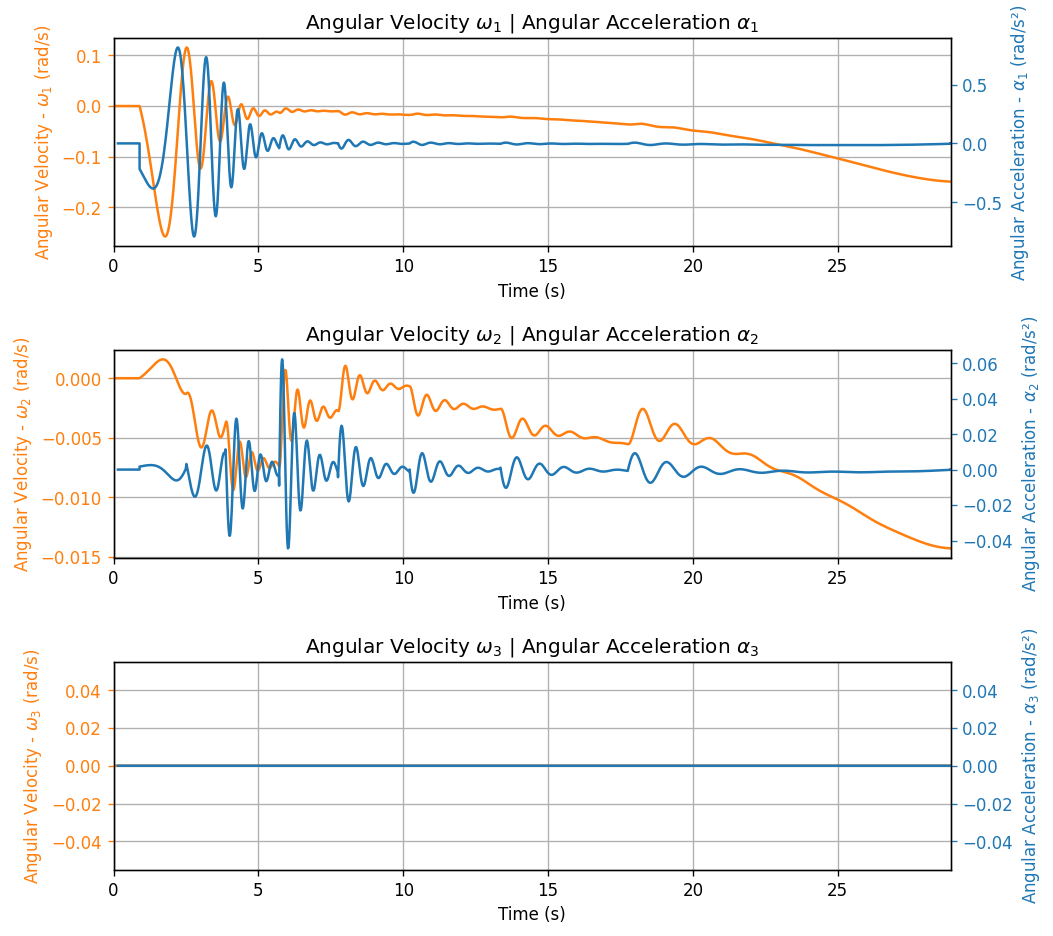



Trajectory Force Plots



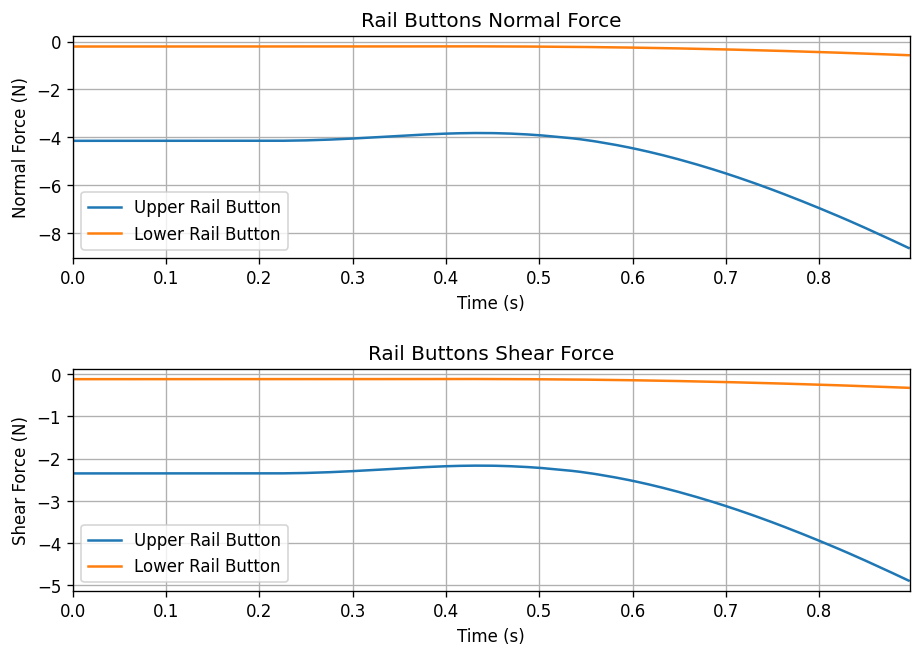

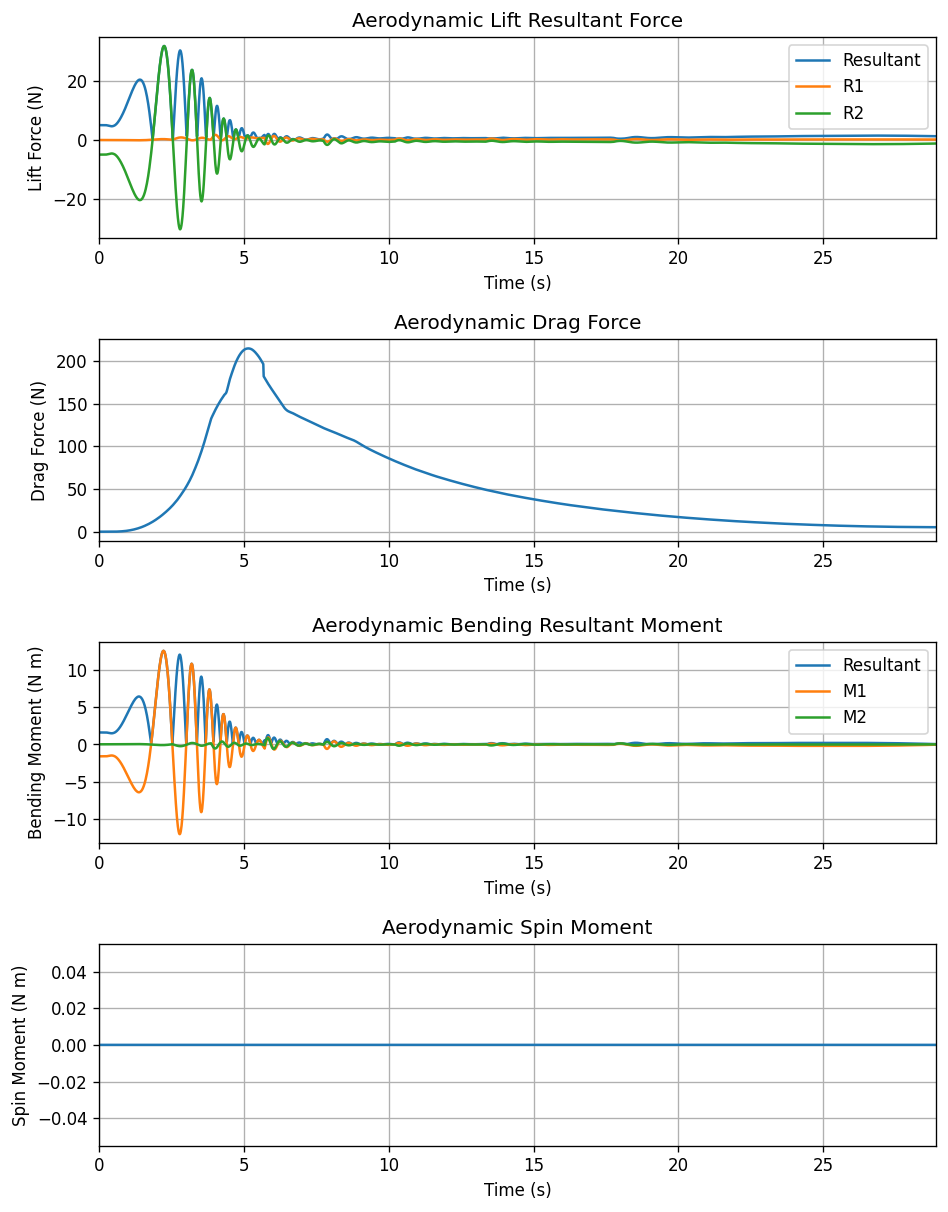



Trajectory Energy Plots



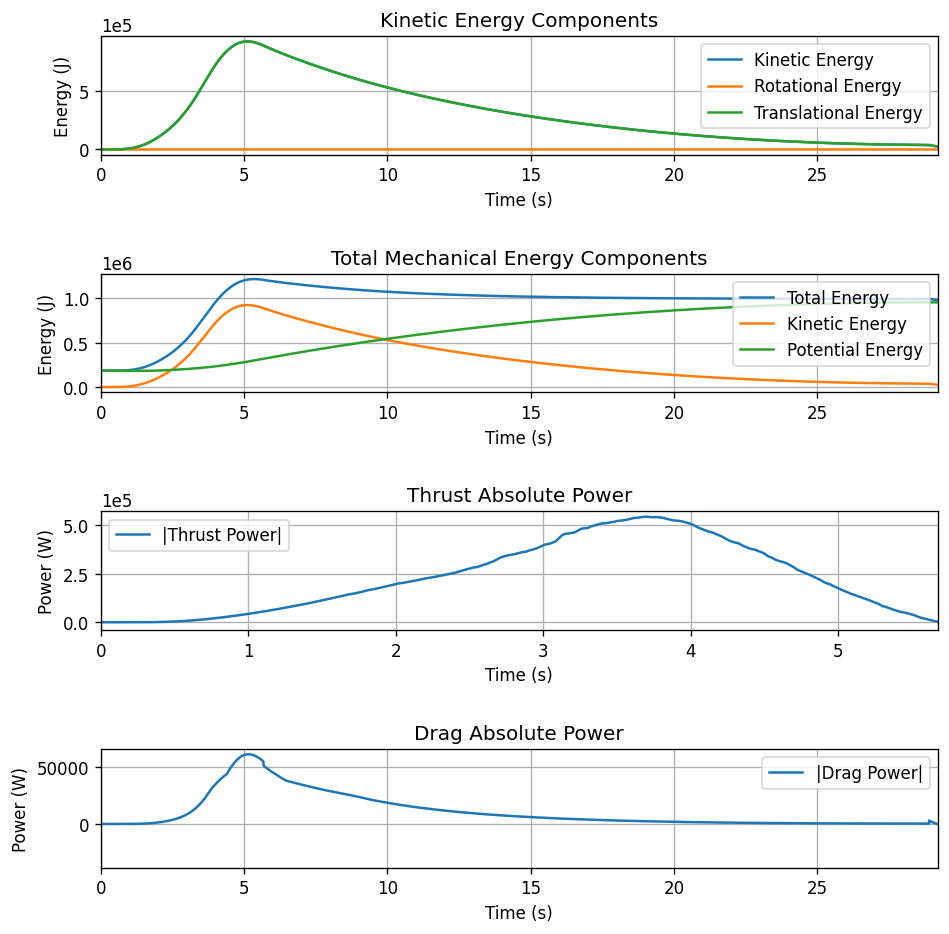



Trajectory Fluid Mechanics Plots



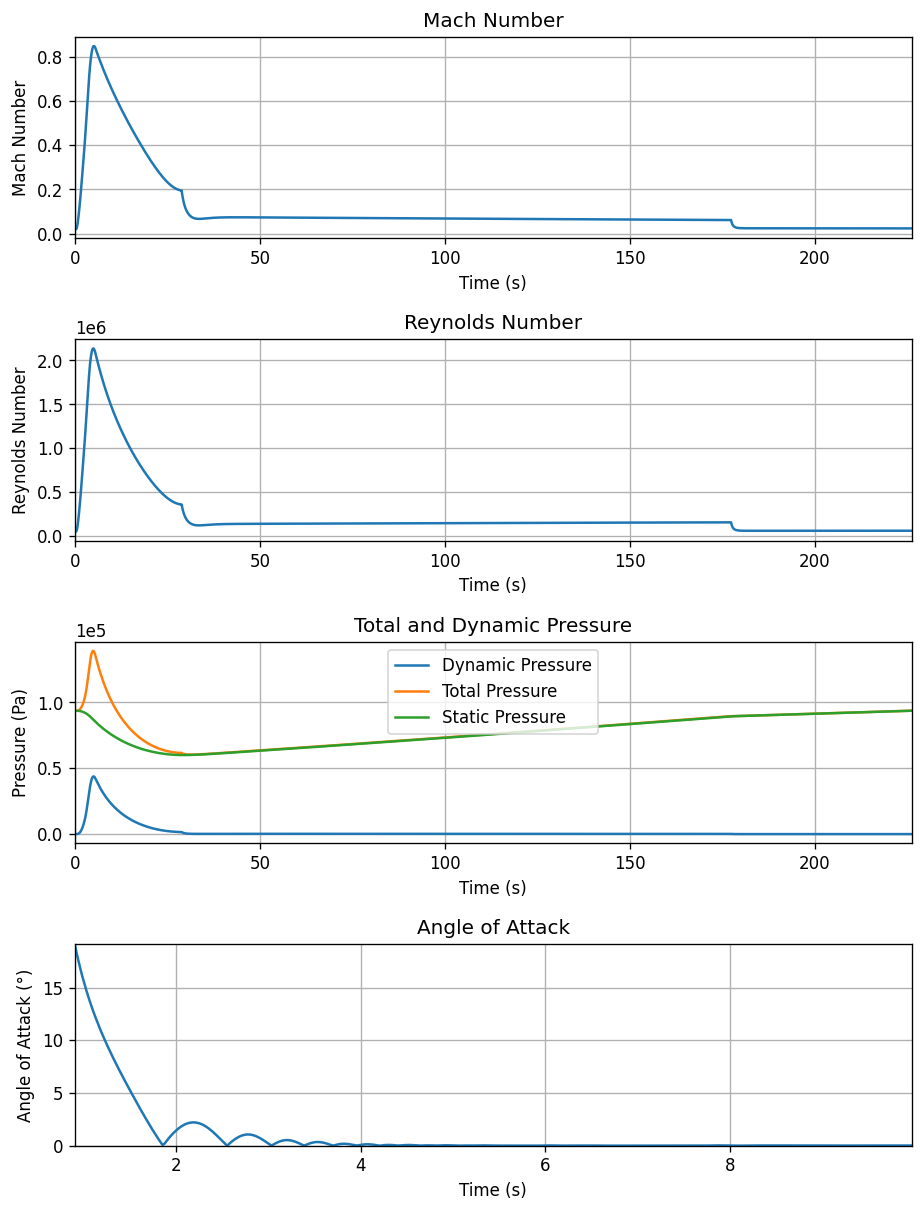



Trajectory Stability and Control Plots



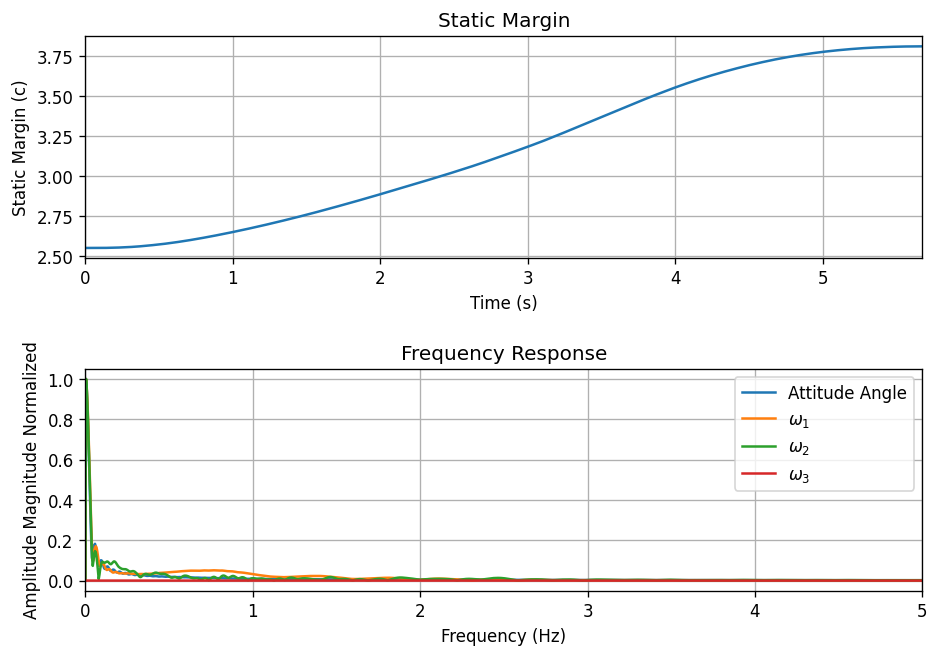

In [ ]:
test_flight = Flight(rocket=Juno, environment=Env, inclination=85, heading=330, rtol=1e-6, atol=1e-6, maxTime=600)
test_flight.allInfo()

# 701

In [ ]:

Grains_CM_position = 2621.565/1000
Fins_position  = (3152-204)/1000
Tail_position   = 3152/1000
Nozzle_position  = 3222.5/1000
UnloadedRocket_CM_position = 2009/1000
Nose_lenght = 558.292/1000

# Now the cordinates system has the origin defined at the unloaded rocket center of mass

Juno = Rocket(motor = Mandioca,
                 radius = 127/2000,
                 mass = 22337/1000,
                 inertiaI = 13.75,
                 inertiaZ = 0.06605,
                 distanceRocketNozzle = -abs(UnloadedRocket_CM_position - Nozzle_position),
                 distanceRocketPropellant = -abs(UnloadedRocket_CM_position - Grains_CM_position),
                 powerOffDrag = PowerOff,   # Drag curve with the motor turned off
                 powerOnDrag = PowerOn)     # Drag curve with the motor turned on

Juno.addNose(length = Nose_lenght, kind = "vonKarman", distanceToCM = abs(UnloadedRocket_CM_position-Nose_lenght))

Juno.addFins(n = 4,span = 0.13, rootChord = 0.160, tipChord=0.09, distanceToCM = (UnloadedRocket_CM_position - Fins_position), airfoil=(NACA701,"degrees"))


Juno.addTail(topRadius = 127/2000, bottomRadius = 102.992/2000, length = 71.5/1000, distanceToCM=-abs(Tail_position-UnloadedRocket_CM_position))

FirstRailButton_position = 1730/1000
SecondRailButton_position = 3142.5/1000
Juno.setRailButtons([UnloadedRocket_CM_position - FirstRailButton_position, UnloadedRocket_CM_position - SecondRailButton_position], 60)

# Parachutes:
Drogue = Juno.addParachute('Drogue',
                     CdS=0.921,
                     trigger = drogueTrigger,
                     samplingRate = 105,
                     noise = (0, 8.3, 0.5),
                     lag=1.0)

Main = Juno.addParachute('Main',
                     CdS = 6.015,
                     trigger = mainTrigger,
                     samplingRate = 105,
                     noise = (0, 8.3, 0.5),
                     lag = 1.0)


Corrector = 0.4624/Juno.powerOffDrag(0.6)
Juno.powerOnDrag *= Corrector
Juno.powerOffDrag *= Corrector

Juno.powerOnDrag *= (Juno.powerOnDrag * 0.6) + (Juno.powerOnDrag * 0.4 * fc_701)
Juno.powerOffDrag *= (Juno.powerOffDrag * 0.6) + (Juno.powerOffDrag * 0.4 * fc_701)

## Trajectory

In [ ]:
sisRecDrogue.reset()
sisRecDrogue.enable()
sisRecMain.reset()
sisRecMain.enable()

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 626.77 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: -0.965 | e1: 0.042 | e2: 0.011 | e3: -0.259
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: -330.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 330.00°


Surface Wind Conditions

Frontal Surface Wind Speed: -6.68 m/s
Lateral Surface Wind Speed: 0.05 m/s


 Rail Departure State

Rail Departure Time: 0.897 s
Rail Departure Velocity: 18.760 m/s
Rail Departure Static Margin: 2.611 c
Rail Departure Angle of Attack: 19.125°
Rail Departure Thrust-Weight Ratio: 5.894
Rail Departure Reynolds Number: 1.593e+05


BurnOut State

BurnOut time: 5.674 s
Altitude at burnOut: 822.794 m (AGL)
Rocket velocity at burnOut: 277.697 m/s
Freestream velocity at burnOut: 281.160 m/s
Mach Number at burnOut: 0.825
Kinetic energy at burnOut: 8.612e+05 J


Apog

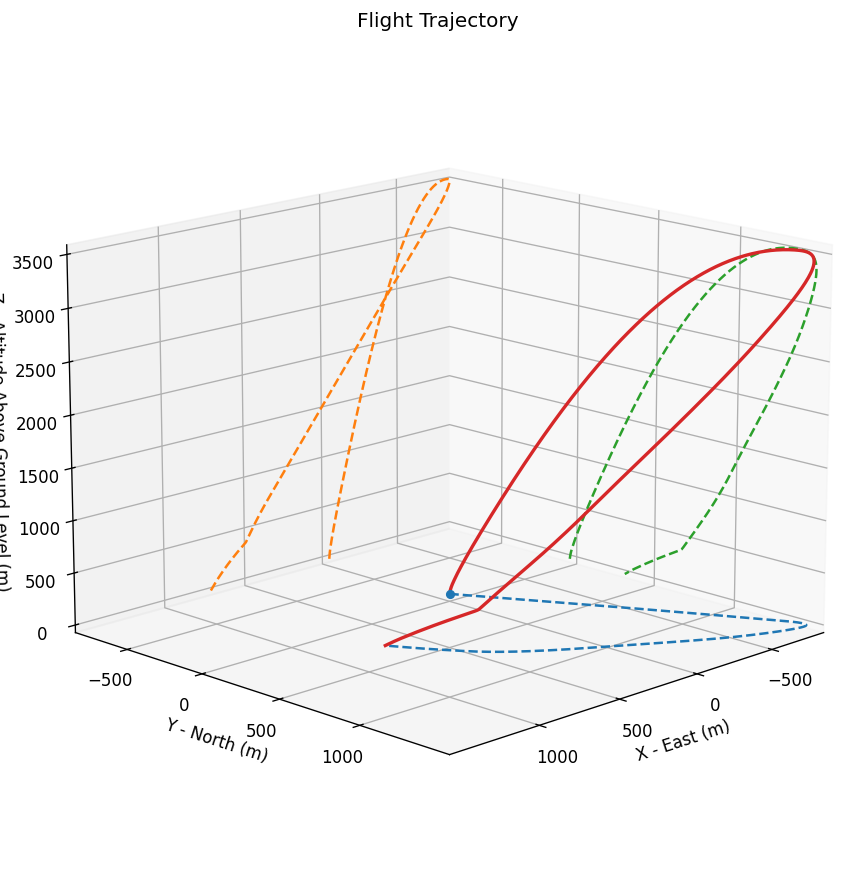



Trajectory Kinematic Plots



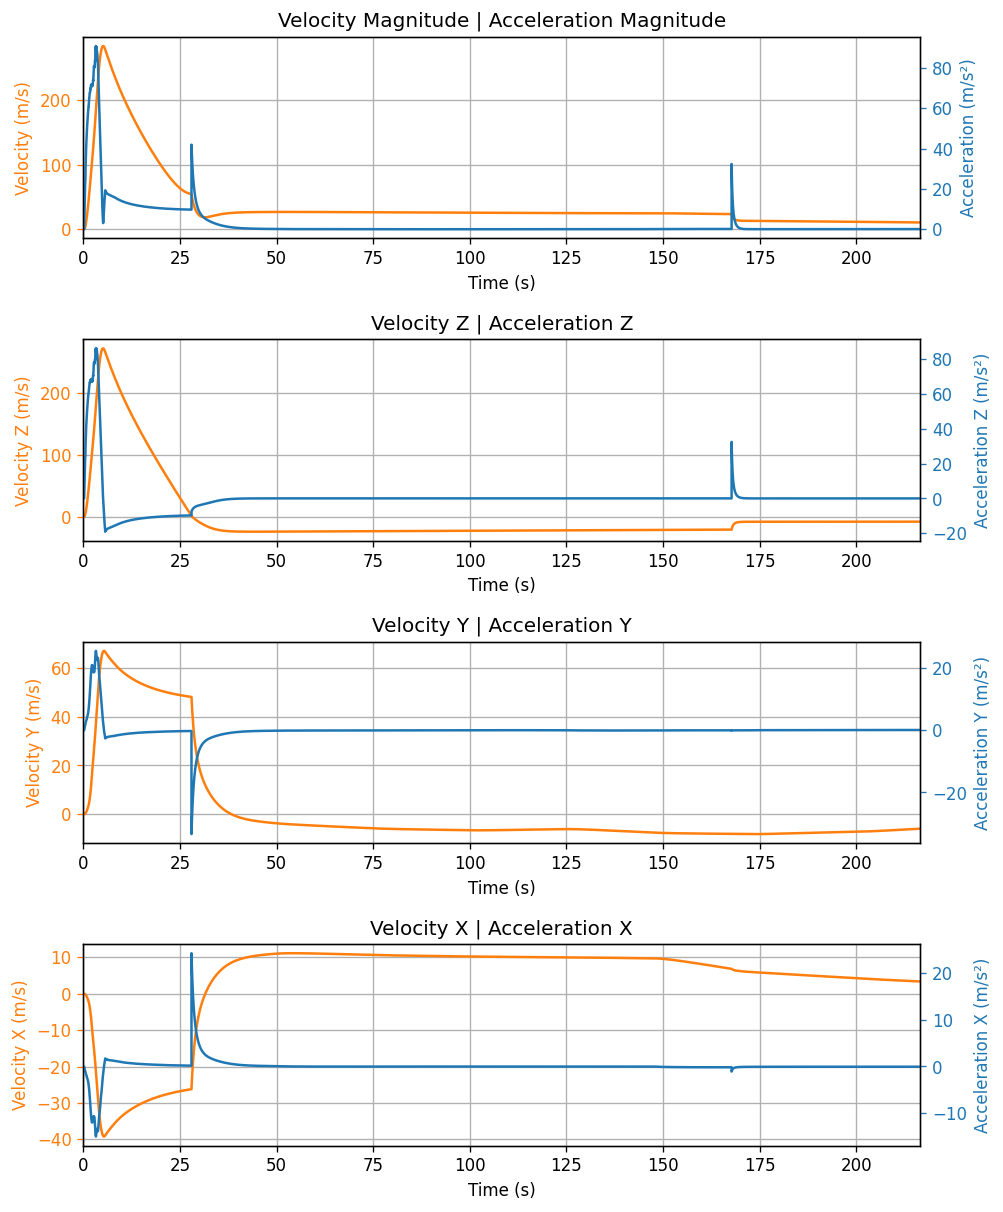



Angular Position Plots



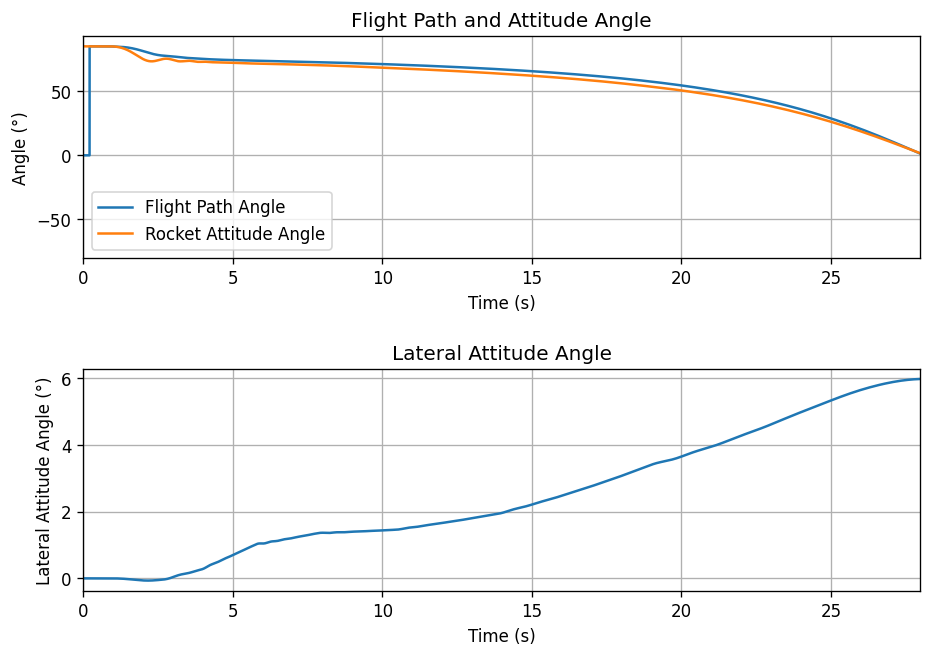



Path, Attitude and Lateral Attitude Angle plots



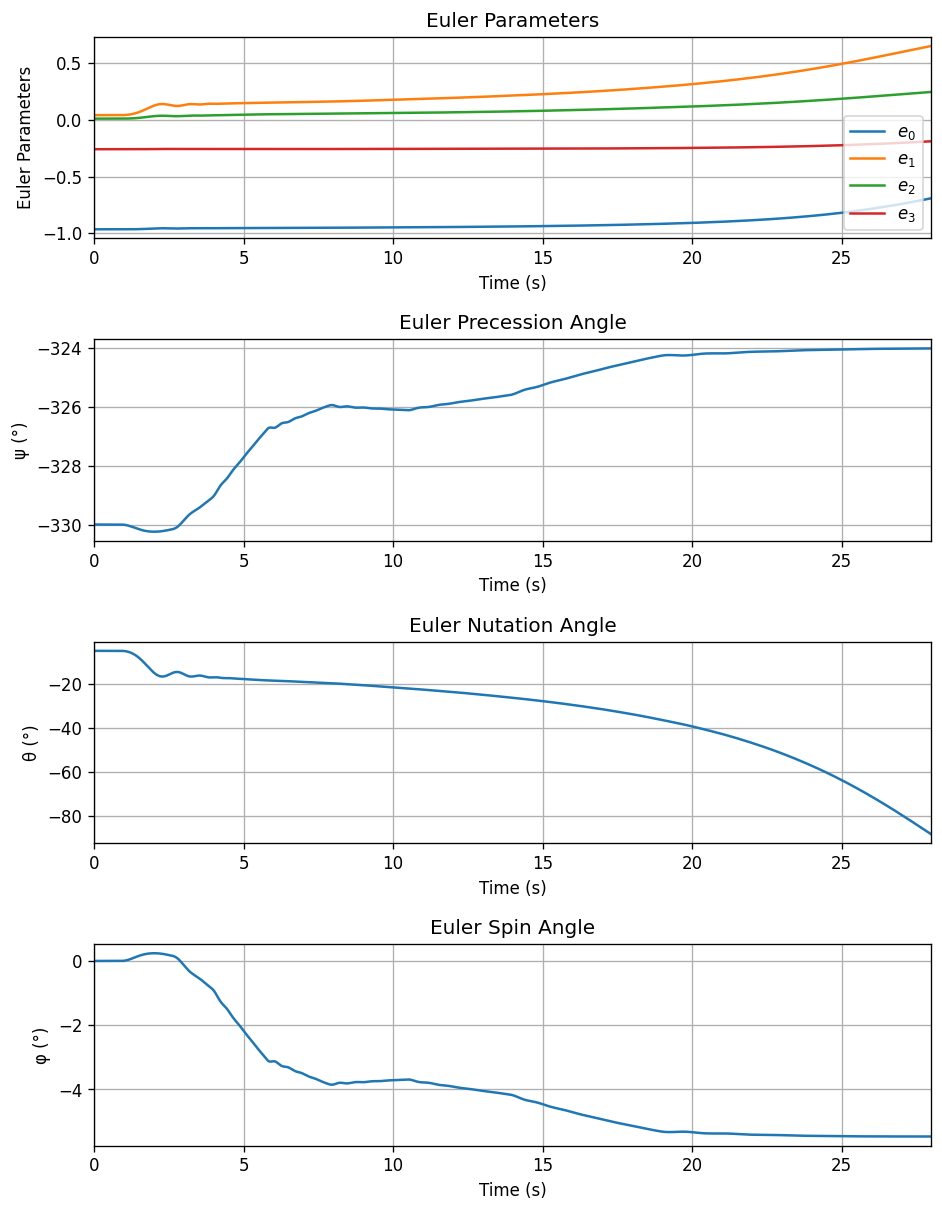



Trajectory Angular Velocity and Acceleration Plots



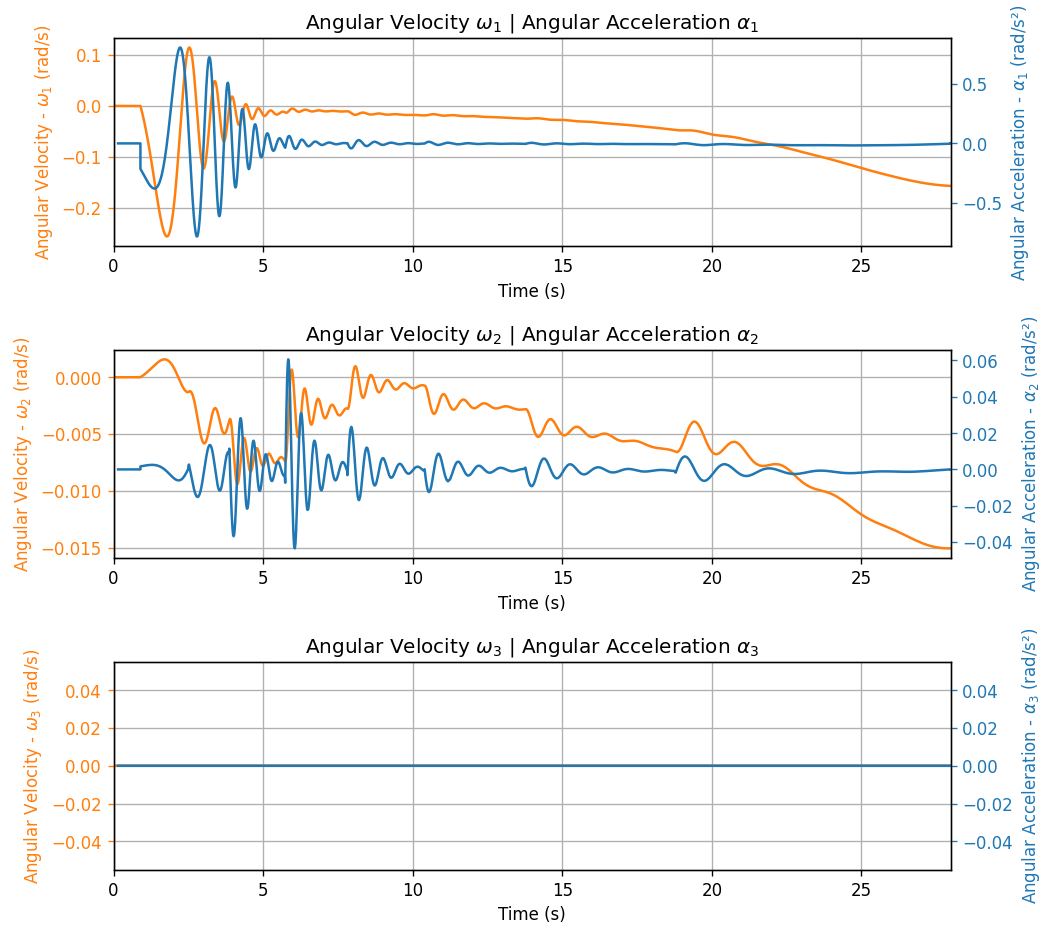



Trajectory Force Plots



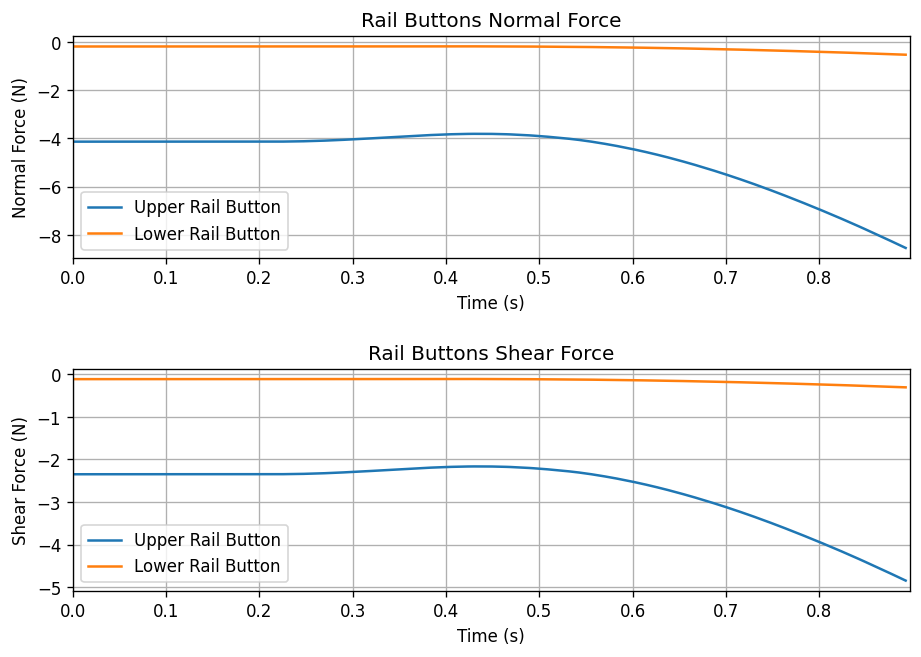

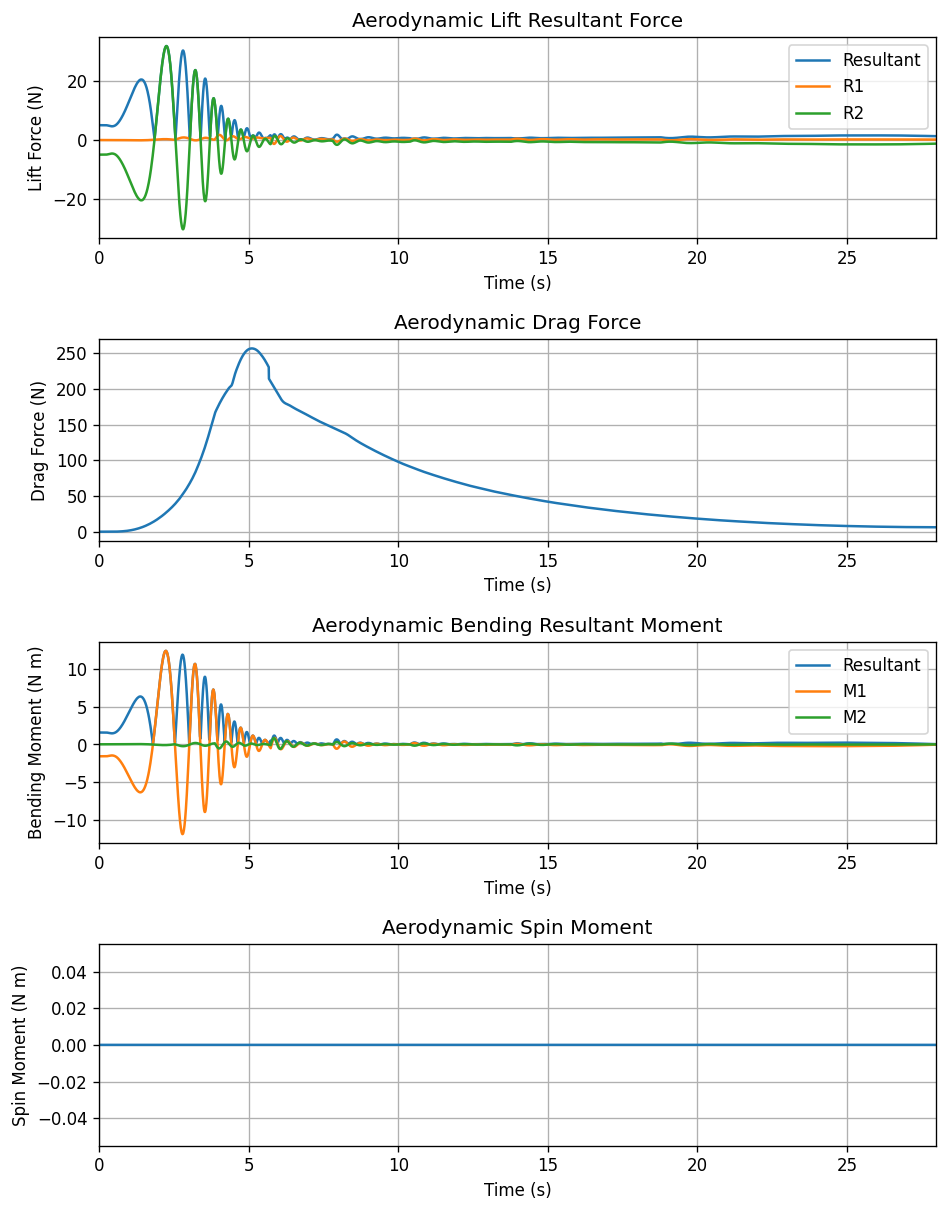



Trajectory Energy Plots



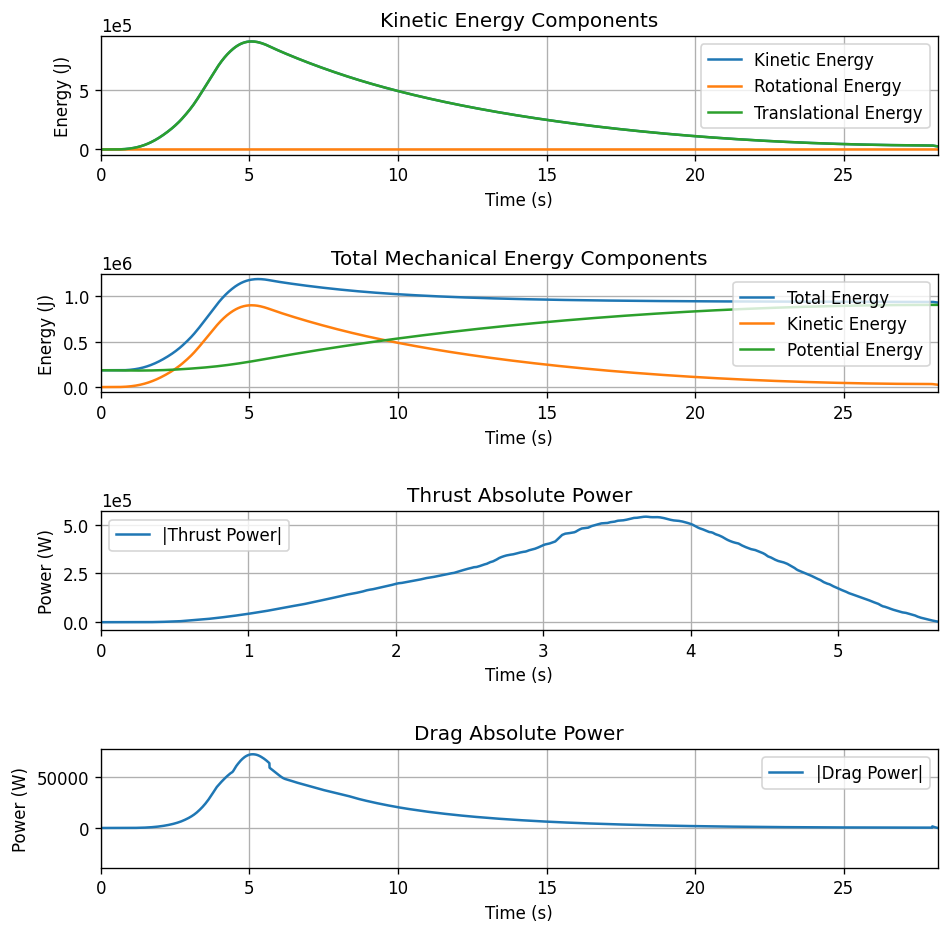



Trajectory Fluid Mechanics Plots



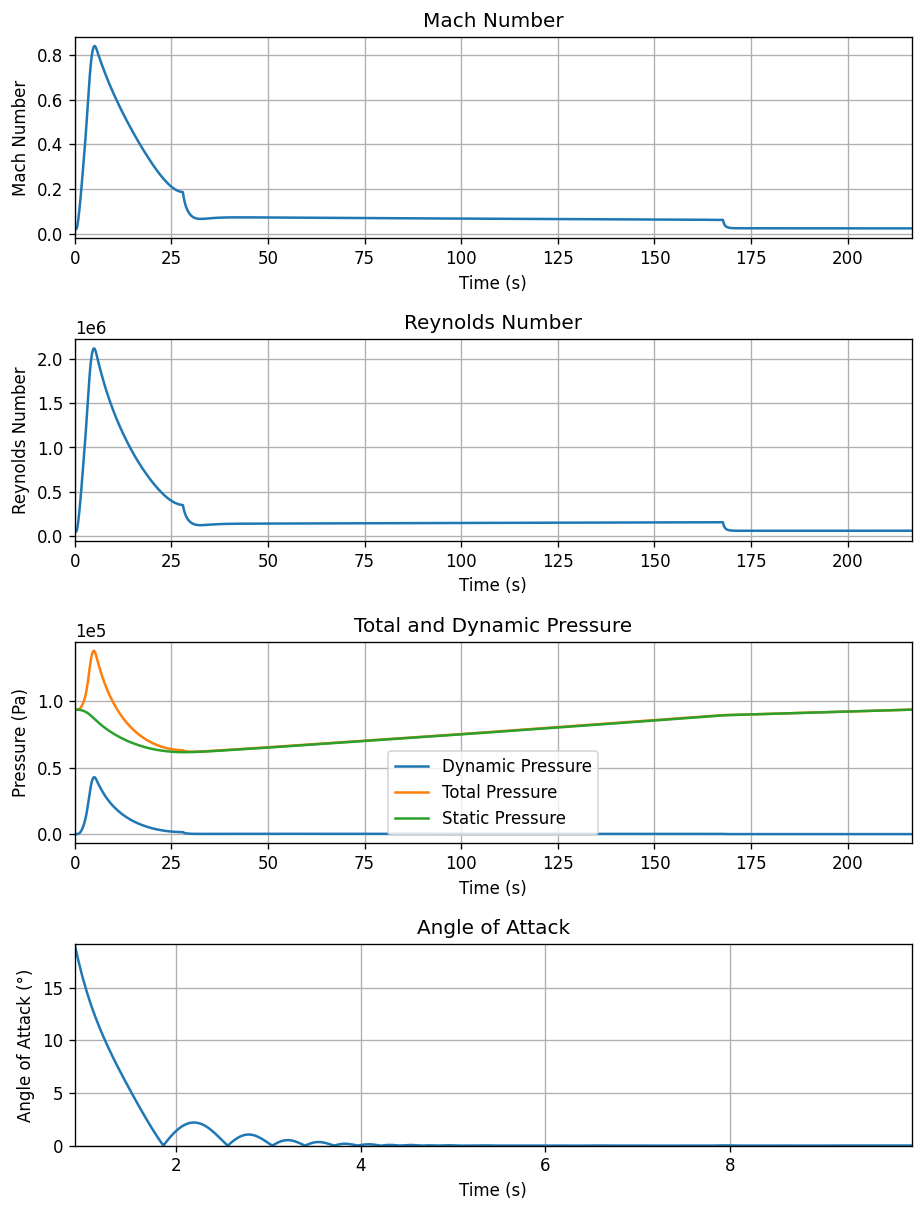



Trajectory Stability and Control Plots



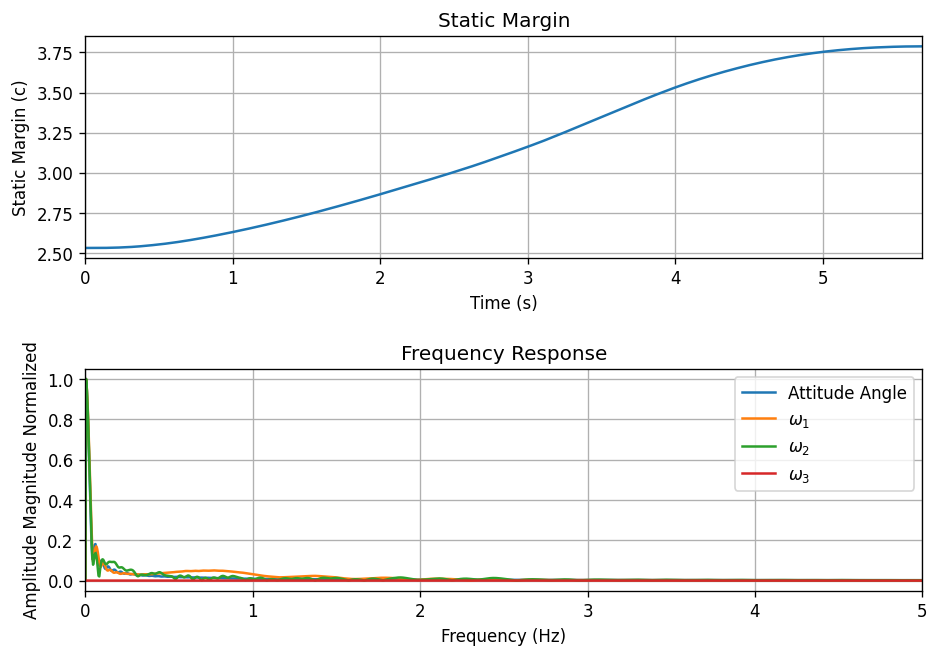

In [ ]:
test_flight = Flight(rocket=Juno, environment=Env, inclination=85, heading=330, rtol=1e-6, atol=1e-6, maxTime=600)
test_flight.allInfo()